In [ ]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.linear_model import Lasso, Ridge
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE

from scipy import stats
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from imblearn.over_sampling import RandomOverSampler

# ***Loading Data***

In [ ]:
# Loading the csv data and saving it to a DataFrame 'df'
df = pd.read_csv('logistic_regression.csv')

# Reading the top 5 rows of data in DataFrame df
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

# ***1. Problem Statement and Exploratory Data Analysis***

**Problen Statement:** As a Data Scientist at CompanyX identify creditworthiness of individuals in Personal Loan Segment based on a set of attributes for an individual.
>* Team should determine if a credit line should be extended to individuals.

**Define Problem Statement and perform Exploratory Data Analysis (10 points)**

* Definition of problem
* Observations on dataset
* Univariate Analysis
* Bivariate Analysis
* Insights based on EDA

In [ ]:
# Creating a function to inspect various aspects of the raw data

from tabulate import tabulate

def data_inspection(df):
  '''
  Description: This function returns basic details about the dataset to perform data inspection:
               1) Rows and columns of the DataFrame
               2) General information about the DataFrame
               3) Number of NULL or missing values in the DataFrame in each column.
  '''
  print("(Rows,Columns) of DataFrame: ",df.shape)  # shape of the data
  print("********************************************************************************")
  print("General Information: \n",tabulate(df.info()))   # general info about the data
  print("********************************************************************************")
  print("# null values in Features: \n\n",df.isnull().sum())     # Number of null values on each column of the data
  print("********************************************************************************")
  #print("Data Statistics (Numerical data): \n",tabulate(df.describe()))   # returns statistical summary of numerical data
  #print("********************************************************************************")
  #print("Data Statistics (Categorical data): \n",tabulate(df.describe(include = object)))   # returns statistical summary of categorical data
  #print("********************************************************************************")

In [ ]:
data_inspection(df)

(Rows,Columns) of DataFrame:  (396030, 27)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non

In [ ]:
# Returns statistical summary of numerical data
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [ ]:
# Returns statistical summary of categorical data along with numerical data
df.describe(include = object)

term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   

                     title earliest_cr_line initial_list_status  \
count               394274           396030              396030   
unique               48816              684                   2   
top     Debt consolidation         Oct-2000                   f   
freq                152472             3017              238066   

       application_type                      address  
count            396030                       396030  
unique                3                       393700  
top          INDIVIDUAL  USCGC Smith\r\nFPO AE 70466  
freq             395319                            8


***Comments:***

* 27 features and 396k samples in the data
* Null values present for 6 features
emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies

In [ ]:
# Function to identify unique value and counts for discrete or categorical data and min max value for continous numerical data

def unique_data(df):
    '''
    Description: unique_data(df) prints unique values and counts present in columns.
                 Features are divided into:
                 Discrete features - Numerical features with less than 10 unique values
                 Continuous features - Numerical features with more than 10 unique values
                 Categorical features - With data type as object

    Input:       The DataFrame for which unique values are required to be printed

    Output:      - Prints value_counts() for Discrete Numerical and Categorcial Features and Min, Max values for Continuous Numerical Features
                 - Returns the list of categorical_features, discrete_features, continuous_features in that order
    '''
    discrete_features = []
    continuous_features = []
    categorical_features = []

    # Iterate through each column in the DataFrame
    for feature in df.columns:
      if df[feature].dtype == object:
        categorical_features.append(feature)
      elif df[feature].nunique() <= 10:
        discrete_features.append(feature)
      else:
        continuous_features.append(feature)

    # Unique values for Discrete Numerical features
    for ft in discrete_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    # Unique values for Continuous Numerical features
    for ft in continuous_features:
      print(f" (Min,Max) for {ft}: {df[ft].min(), df[ft].max()}")           # Print the unique values and their counts
      print("********************************************************")     # Print a separator

    # Unique values for Categorical non Numerical features
    for ft in categorical_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    return categorical_features, discrete_features, continuous_features

In [ ]:
help(unique_data)

Help on function unique_data in module __main__:

unique_data(df)
    Description: unique_data(df) prints unique values and counts present in columns.
                 Features are divided into:
                 Discrete features - Numerical features with less than 10 unique values
                 Continuous features - Numerical features with more than 10 unique values
                 Categorical features - With data type as object
    
    Input:       The DataFrame for which unique values are required to be printed
    
    Output:      - Prints value_counts() for Discrete Numerical and Categorcial Features and Min, Max values for Continuous Numerical Features
                 - Returns the list of categorical_features, discrete_features, continuous_features in that order



In [ ]:
# Unpacking different column types and printing unique values for each column
cat, num_dis, num_con = unique_data(df)

Unique values for  pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
********************************************************
 (Min,Max) for loan_amnt: (500.0, 40000.0)
********************************************************
 (Min,Max) for int_rate: (5.32, 30.99)
********************************************************
 (Min,Max) for installment: (16.08, 1533.81)
********************************************************
 (Min,Max) for annual_inc: (0.0, 8706582.0)
********************************************************
 (Min,Max) for dti: (0.0, 9999.0)
********************************************************
 (Min,Max) for open_acc: (0.0, 90.0)
********************************************************
 (Min,Max) for pub_rec: (0.0, 86.0)
********************************************************
 (Min,Max) for revol_bal: (0.0, 1743266.0)
*******************************

***Comments:***

* 27 features and 396k samples in the data
* Null values present for 6 features
emp_title, **emp_length**, title, **revol_util**, **mort_acc**, **pub_rec_bankruptcies** - Missing Value treatment to be done for highlighted columns as others would be dropped.

* **Loan duration** is either 36 (3 yrs) or 60 months (5 yrs) - Majorly 3 yrs hence such a short term loan would be for motorcycle, other small items.
* **Grade assigned by CompanyX** is from A to G, large number of loans have B & C grade loans.
* **Home ownership** is categorized as
>* MORTGAGE - still paying off mortgage, high risk
>* RENT - rent, medium risk
>* OWN - mortgage if any, paid off, low risk
>* OTHER - enough information not available
>* NONE - enough information not available
>* ANY - enough information not available

* **Verification Status** for 2/3rd individuals is verified, about 1/3rd Not verified.
* **Loan status** is Fully Paid for most, and Charged off for some.
* **Initial List status** i.e. loan's first category is 1.5 times more with "f", then "w"
* Most **Loan application type** is Individual, followed by Joint, and Direct_pay
* **Bankrupcy records for borrower** (pub_rec_bankruptcies) is categorized between 0 to 8 from most with 0 and least with 8.

* loan_amnt is (500.0, 40000.0)
* int_rate is (5.32, 30.99)
* installment is (16.08, 1533.81)
* annual_inc is (0.0, 8706582.0)
* dti
 (Min,Max) : (0.0, 9999.0)
* open_acc
 (Min,Max) : (0.0, 90.0)
* pub_rec
 (Min,Max) : (0.0, 86.0)
* revol_bal
 (Min,Max) : (0.0, 1743266.0)
* revol_util
 (Min,Max) : (0.0, 892.3)
* total_acc
 (Min,Max) : (2.0, 151.0)

In [ ]:
# Drop columns not needed for analysis

df.drop(['emp_title','title','open_acc','revol_bal','total_acc','initial_list_status','application_type','address'],axis = 1, inplace = True)

***Univariate Analysis***

In [ ]:
# Listing columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

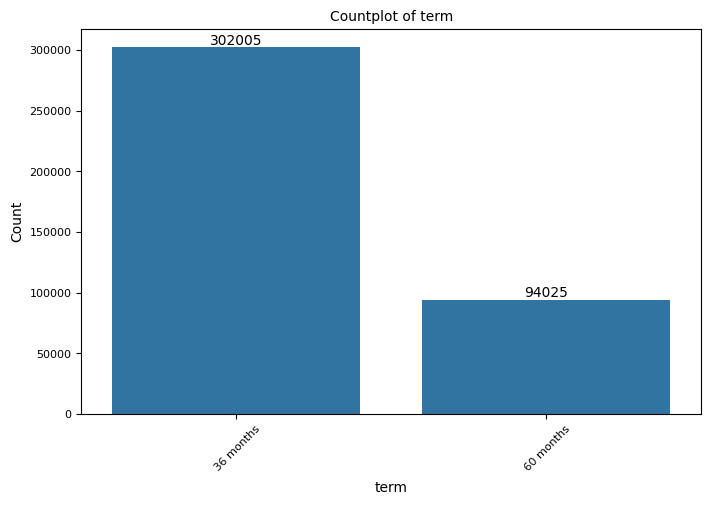

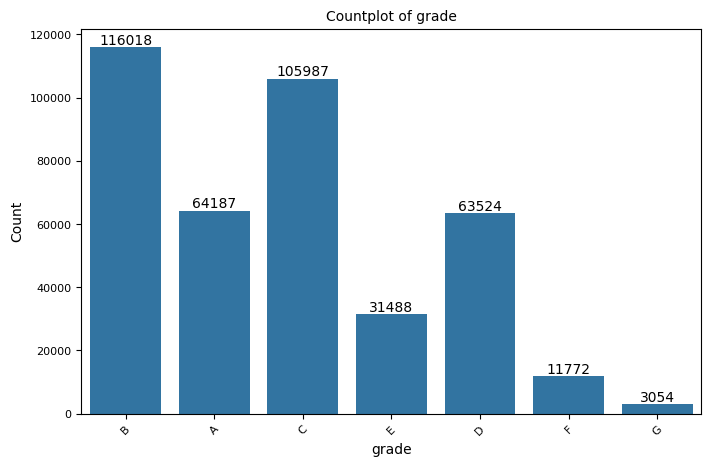

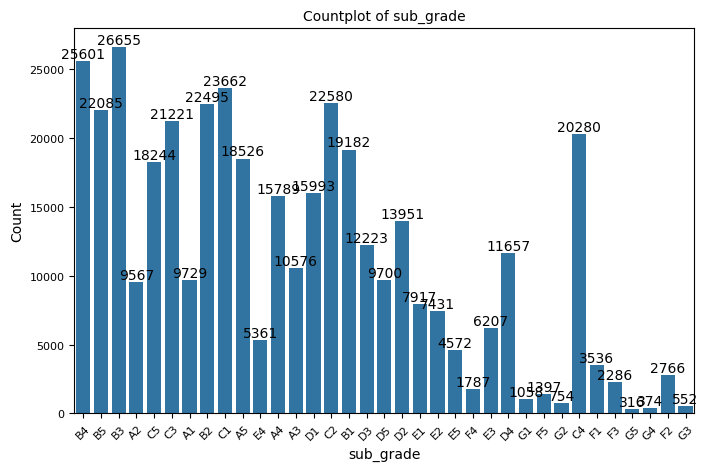

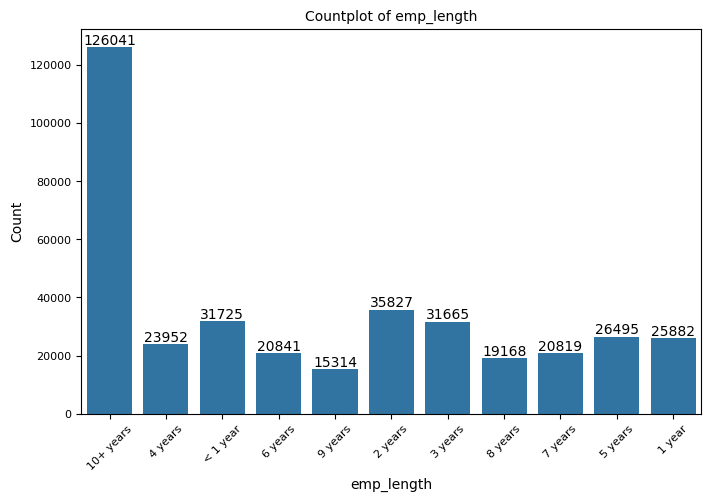

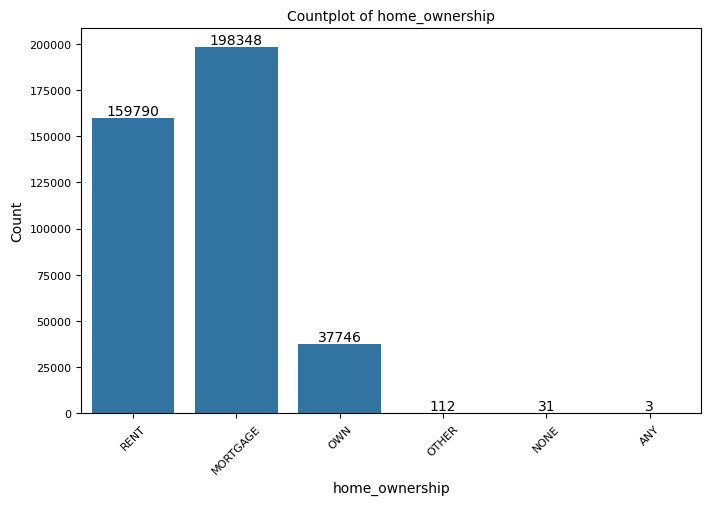

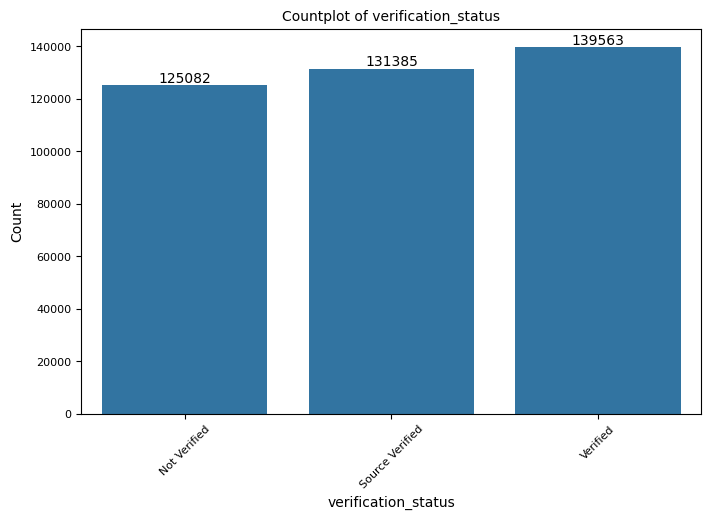

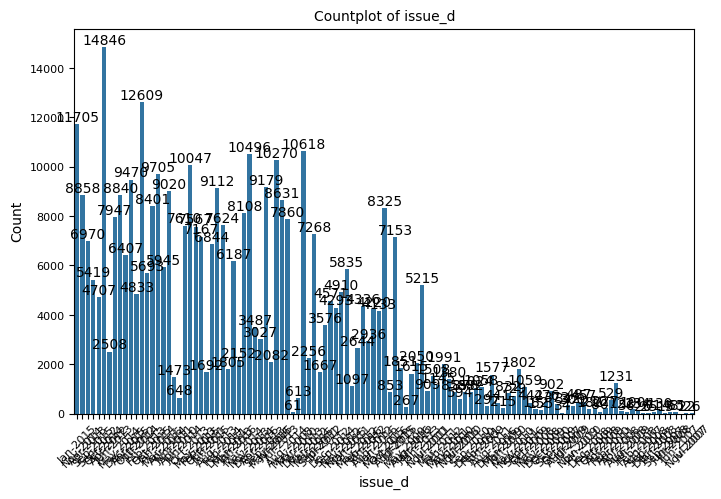

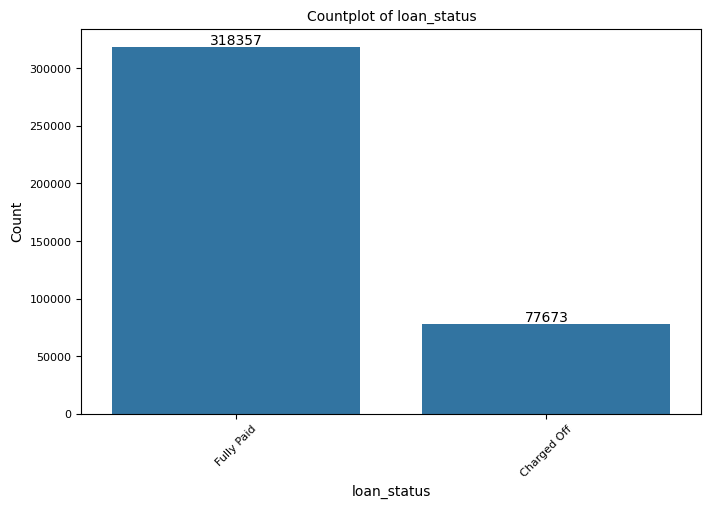

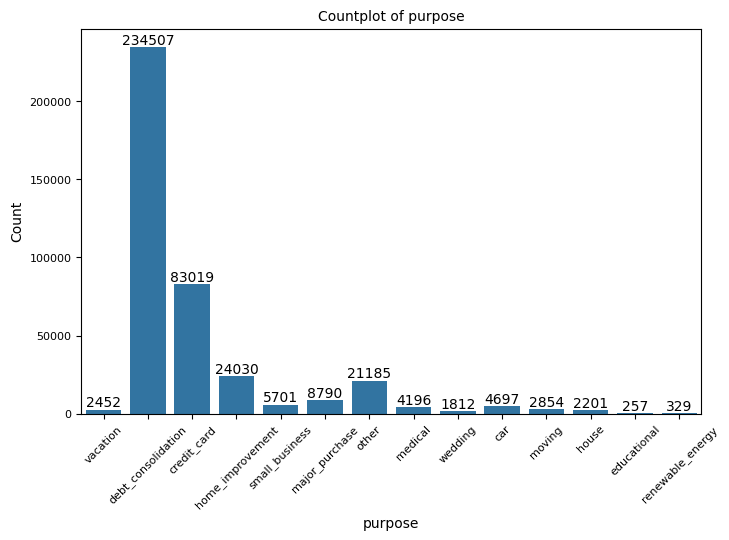

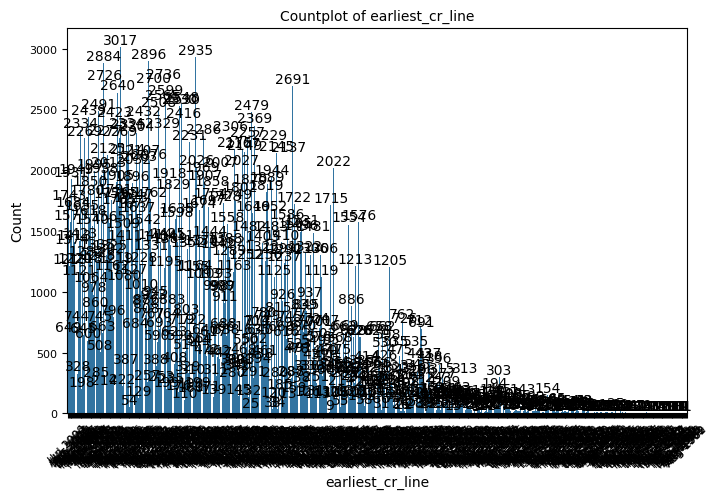

In [ ]:
# Plotting Count plot for categorical features

for feature in df.columns:
  # Skipping numeric features for plotting count plot
  if df[feature].dtype != 'object':
    continue

  # Count plot
  plt.figure(figsize=(8, 5))

  ax = sns.countplot(data = df, x = df[feature])
  for label in ax.containers:
    ax.bar_label(label)

  # Add title and labels
  plt.title(f'Countplot of {feature}',fontsize = 10)
  plt.xlabel(feature)
  plt.xticks(fontsize = 8, rotation = 45)
  plt.ylabel('Count')
  plt.yticks(fontsize = 8)

  # Show the plot
  plt.show()


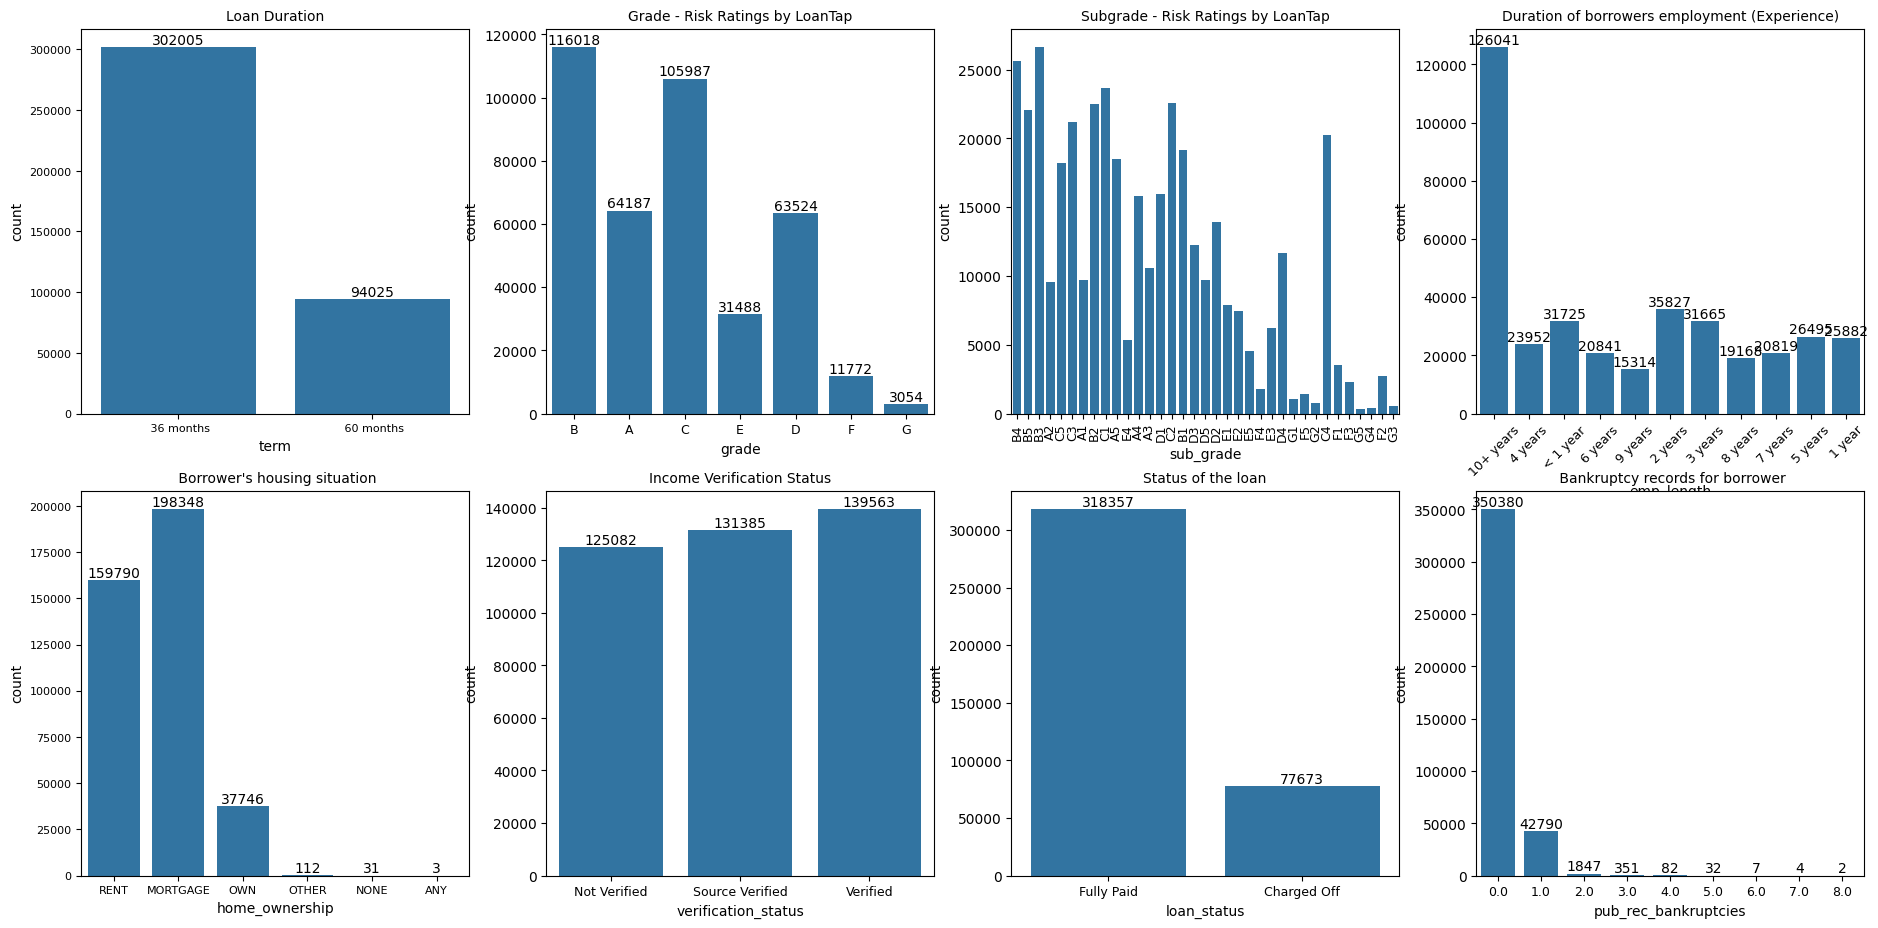

In [ ]:
# Plotting Categorical variables using countplot

plt.figure(figsize = (23,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Loan Duration",fontsize = 10)
ax = sns.countplot(data = df, x = 'term')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Grade - Risk Ratings by CompanyX",fontsize = 10)
ax = sns.countplot(data = df, x = 'grade' )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9, rotation = 90)
plt.title("Subgrade - Risk Ratings by CompanyX",fontsize = 10)
sns.countplot(data = df, x = 'sub_grade') #, order = df["subgrade"].value_counts().index)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9, rotation = 45)
plt.title("Duration of borrowers employment (Experience)",fontsize = 10)
ax = sns.countplot(data = df, x = 'emp_length')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title(" Borrower's housing situation",fontsize = 10)
ax = sns.countplot(data = df, x = 'home_ownership')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Income Verification Status",fontsize = 10)
ax = sns.countplot(data = df, x = 'verification_status' )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Status of the loan",fontsize = 10)
ax = sns.countplot(data = df, x = 'loan_status') #, order = df["loan_status"].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title(" Bankruptcy records for borrower",fontsize = 10)
ax = sns.countplot(data = df, x = 'pub_rec_bankruptcies')
for label in ax.containers:
    ax.bar_label(label)

plt.show()

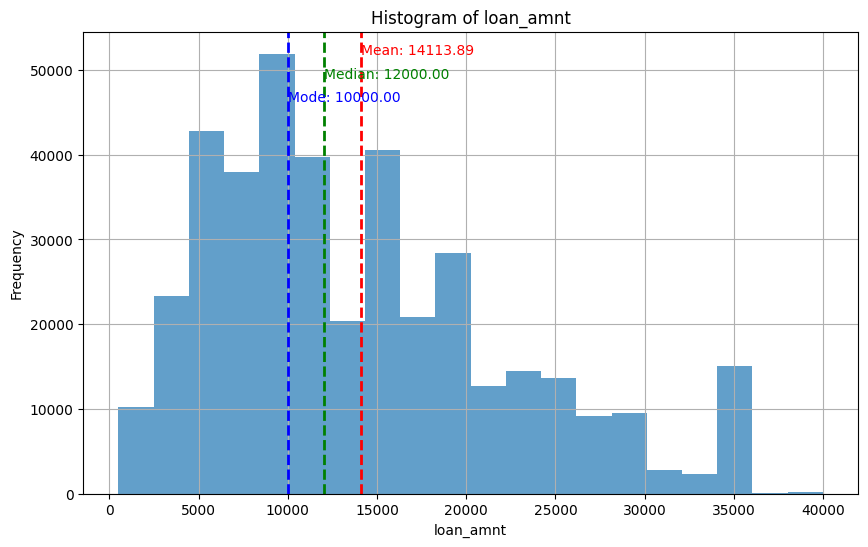

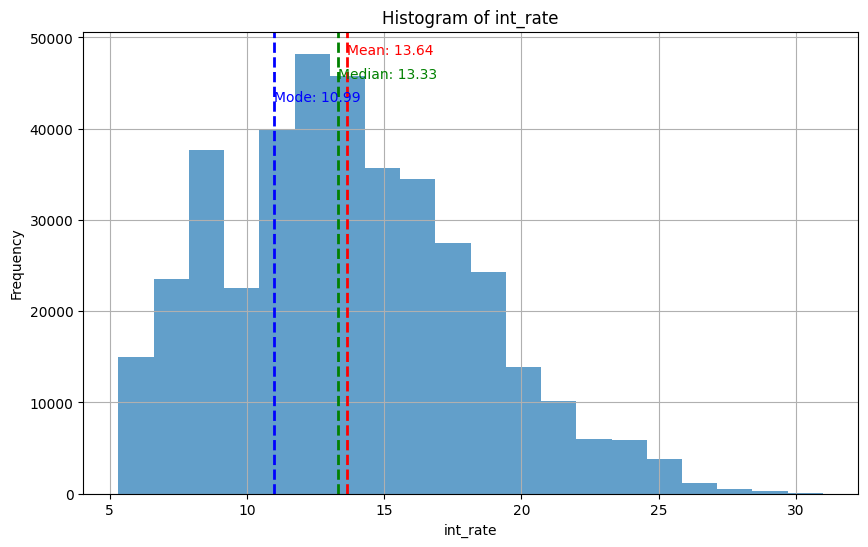

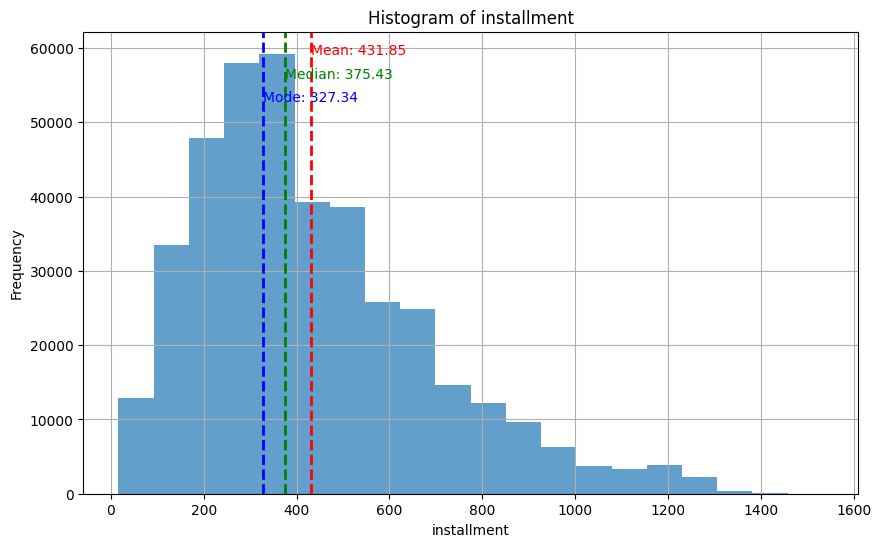

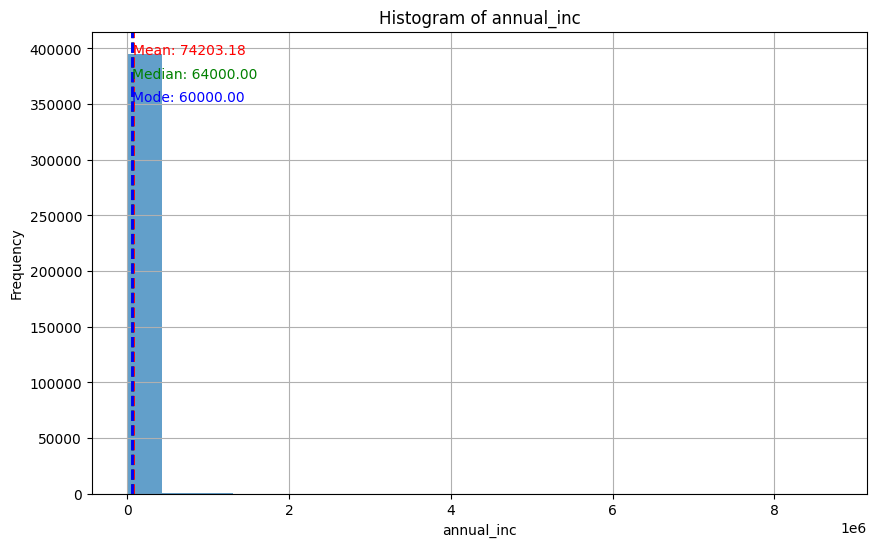

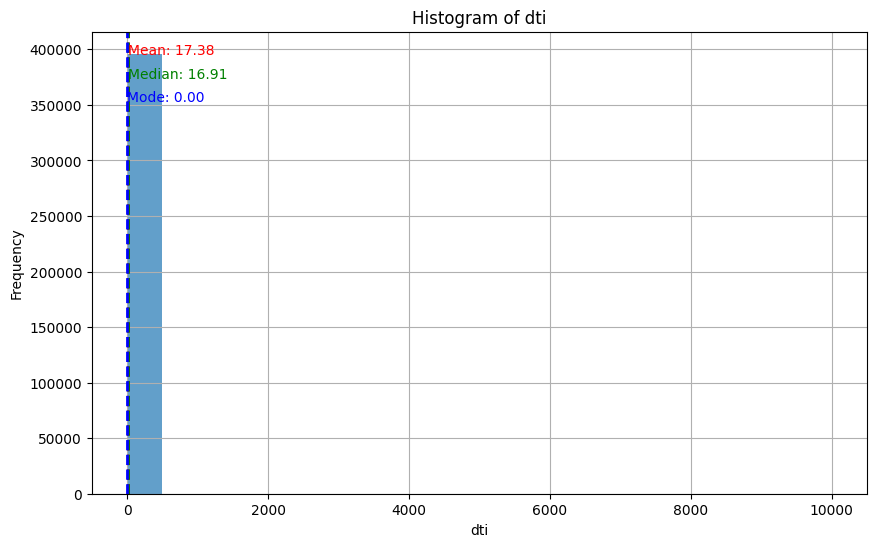

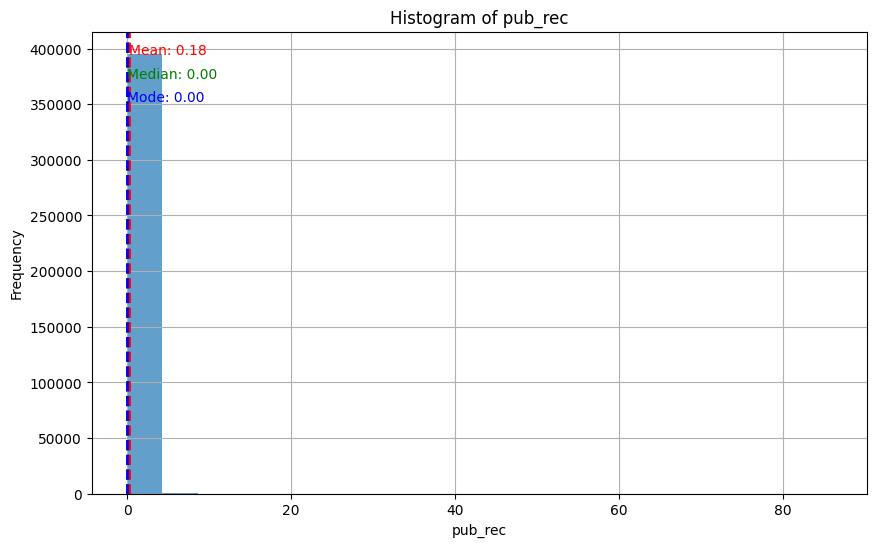

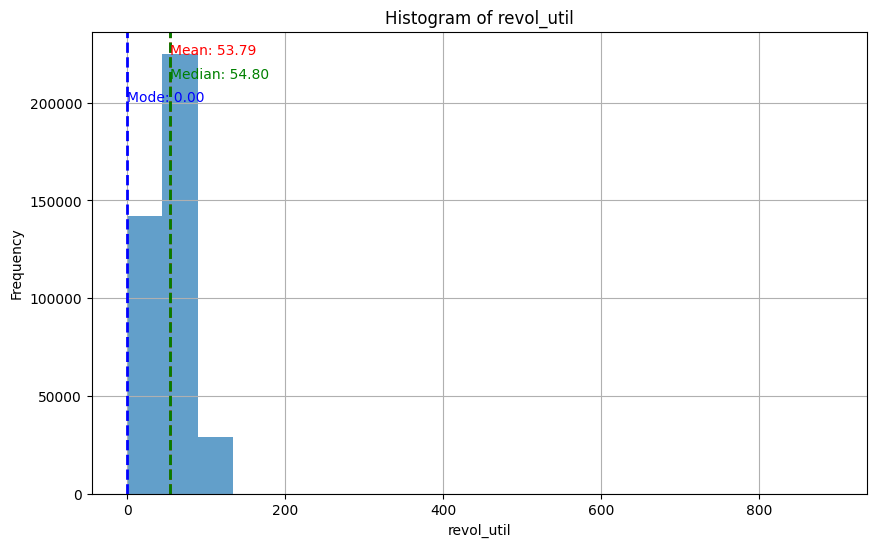

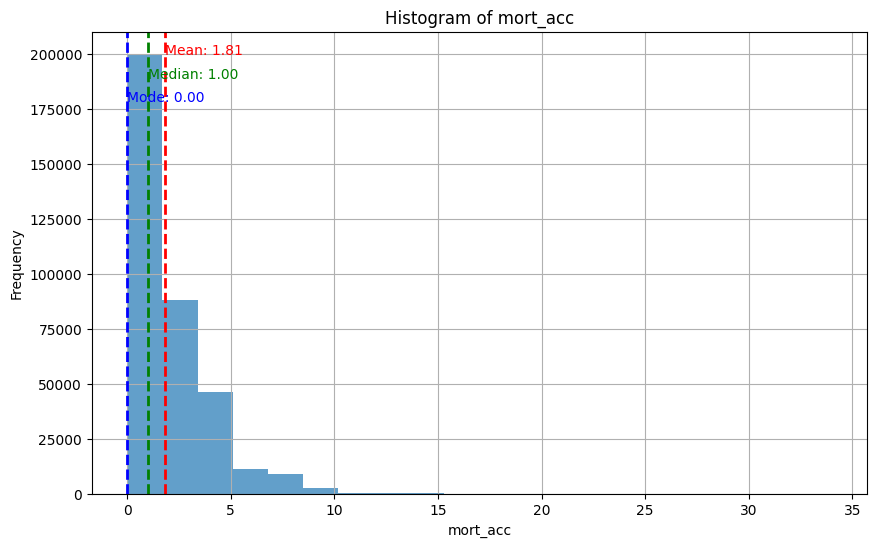

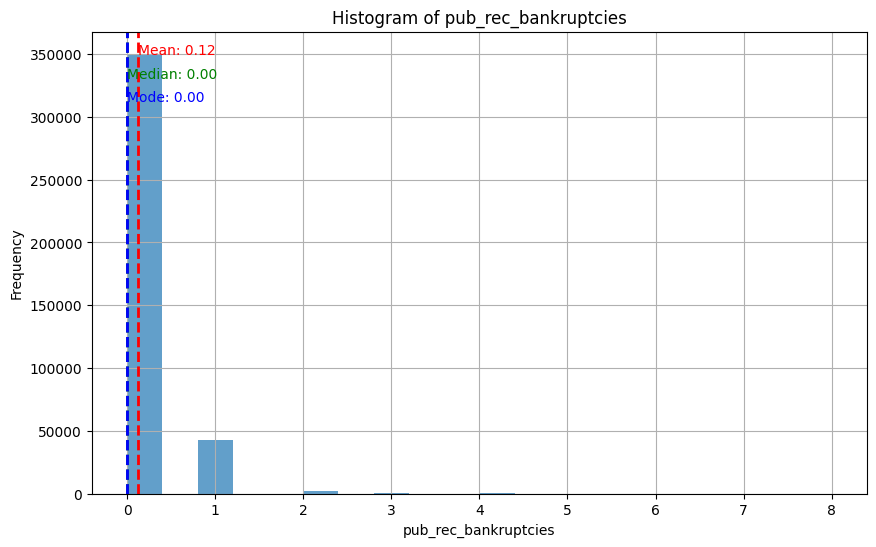

In [ ]:
# Plotting Histogram for Continuous Variables
import numpy as np
import matplotlib.pyplot as plt

for feature in df.columns:
    # Skipping non-numeric features for histogram plotting
    if df[feature].dtype == 'object':
        continue

    # Calculate mean, median, and mode
    mean = df[feature].mean()  # Fill in the blank to calculate mean
    median = df[feature].median()  # Fill in the blank to calculate median
    mode = df[feature].mode().get(0, np.nan)  # Fill in the blank to calculate mode

    # Create the histogram
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=20, alpha=0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mean
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2)  # Fill in the blank to plot median
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mode

    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color = 'red')  # Fill in the blank to annotate mean
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color = 'green')  # Fill in the blank to annotate median
    plt.text(mode, plt.ylim()[1] * 0.85, f'Mode: {mode:.2f}', color = 'blue')  # Fill in the blank to annotate mode

    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

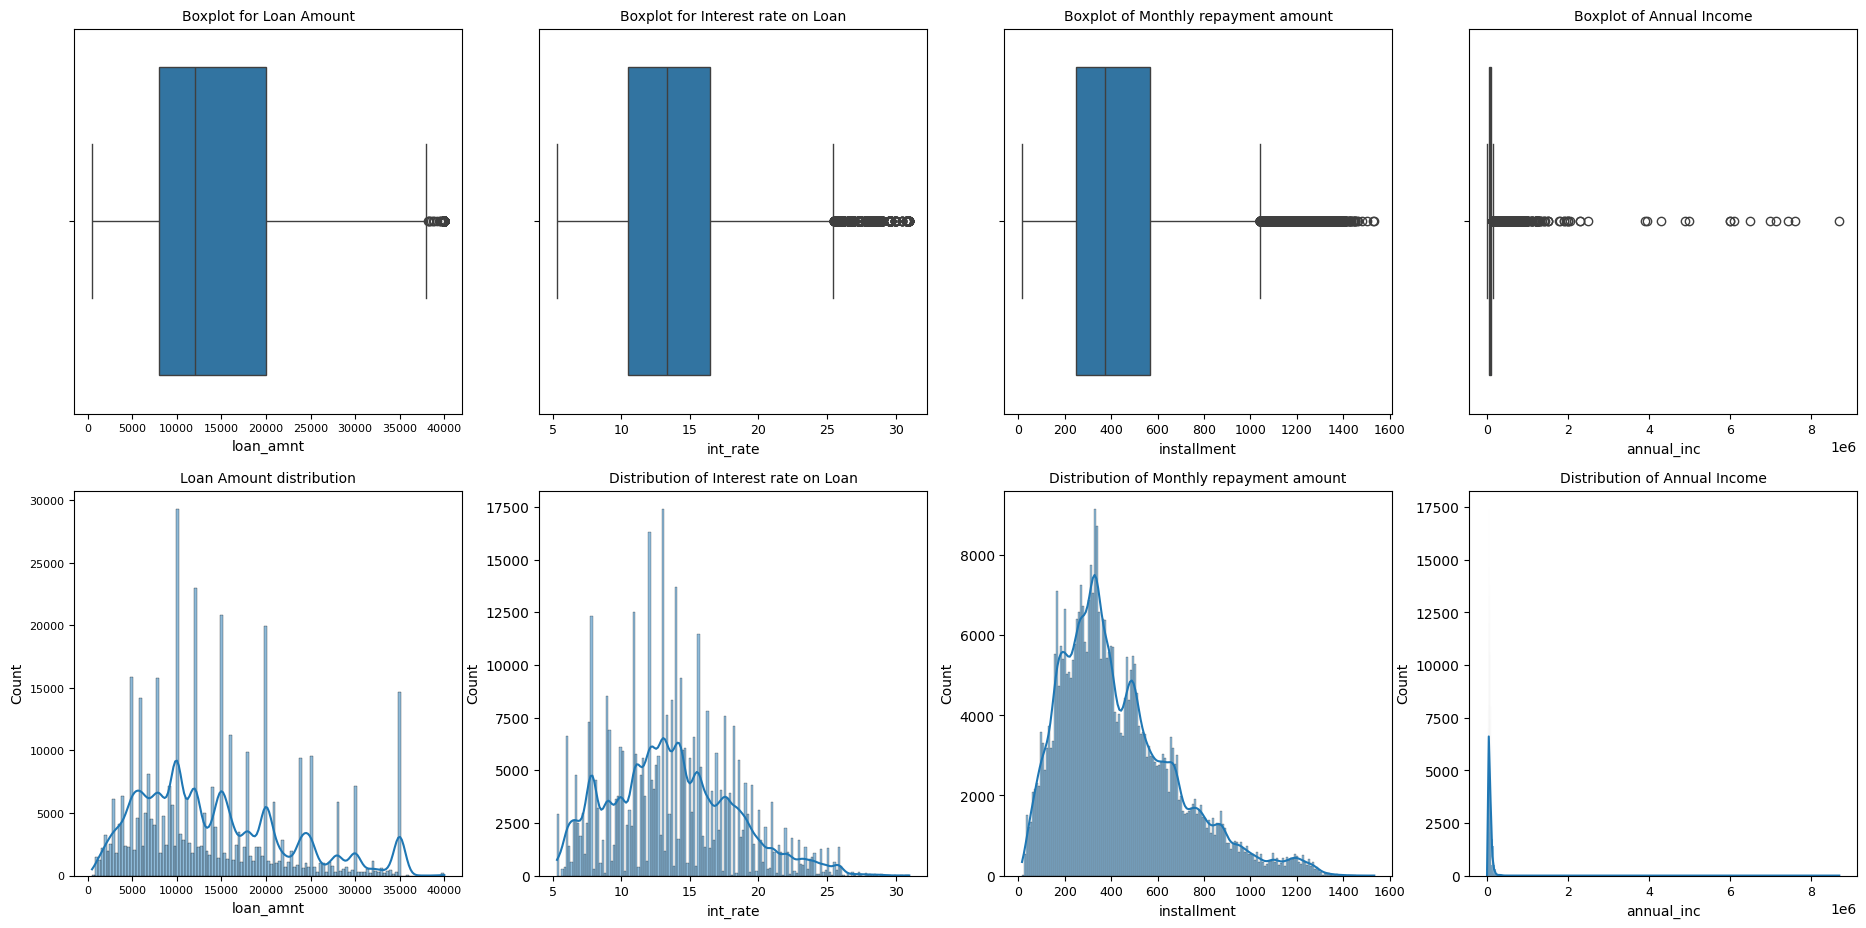

In [ ]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (23,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Loan Amount",fontsize = 10)
sns.boxplot(data = df, x = 'loan_amnt')

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Interest rate on Loan",fontsize = 10)
sns.boxplot(data = df, x = 'int_rate')

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot of Monthly repayment amount",fontsize = 10)
sns.boxplot(data = df, x = 'installment')

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot of Annual Income",fontsize = 10)
sns.boxplot(data = df, x = 'annual_inc')

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Loan Amount distribution",fontsize = 10)
sns.histplot(data = df, x = 'loan_amnt', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Distribution of Interest rate on Loan",fontsize = 10)
sns.histplot(data = df, x = 'int_rate', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Distribution of Monthly repayment amount",fontsize = 10)
sns.histplot(data = df, x = 'installment', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Distribution of Annual Income",fontsize = 10)
sns.histplot(data = df, x = 'annual_inc', kde = True)

plt.show()

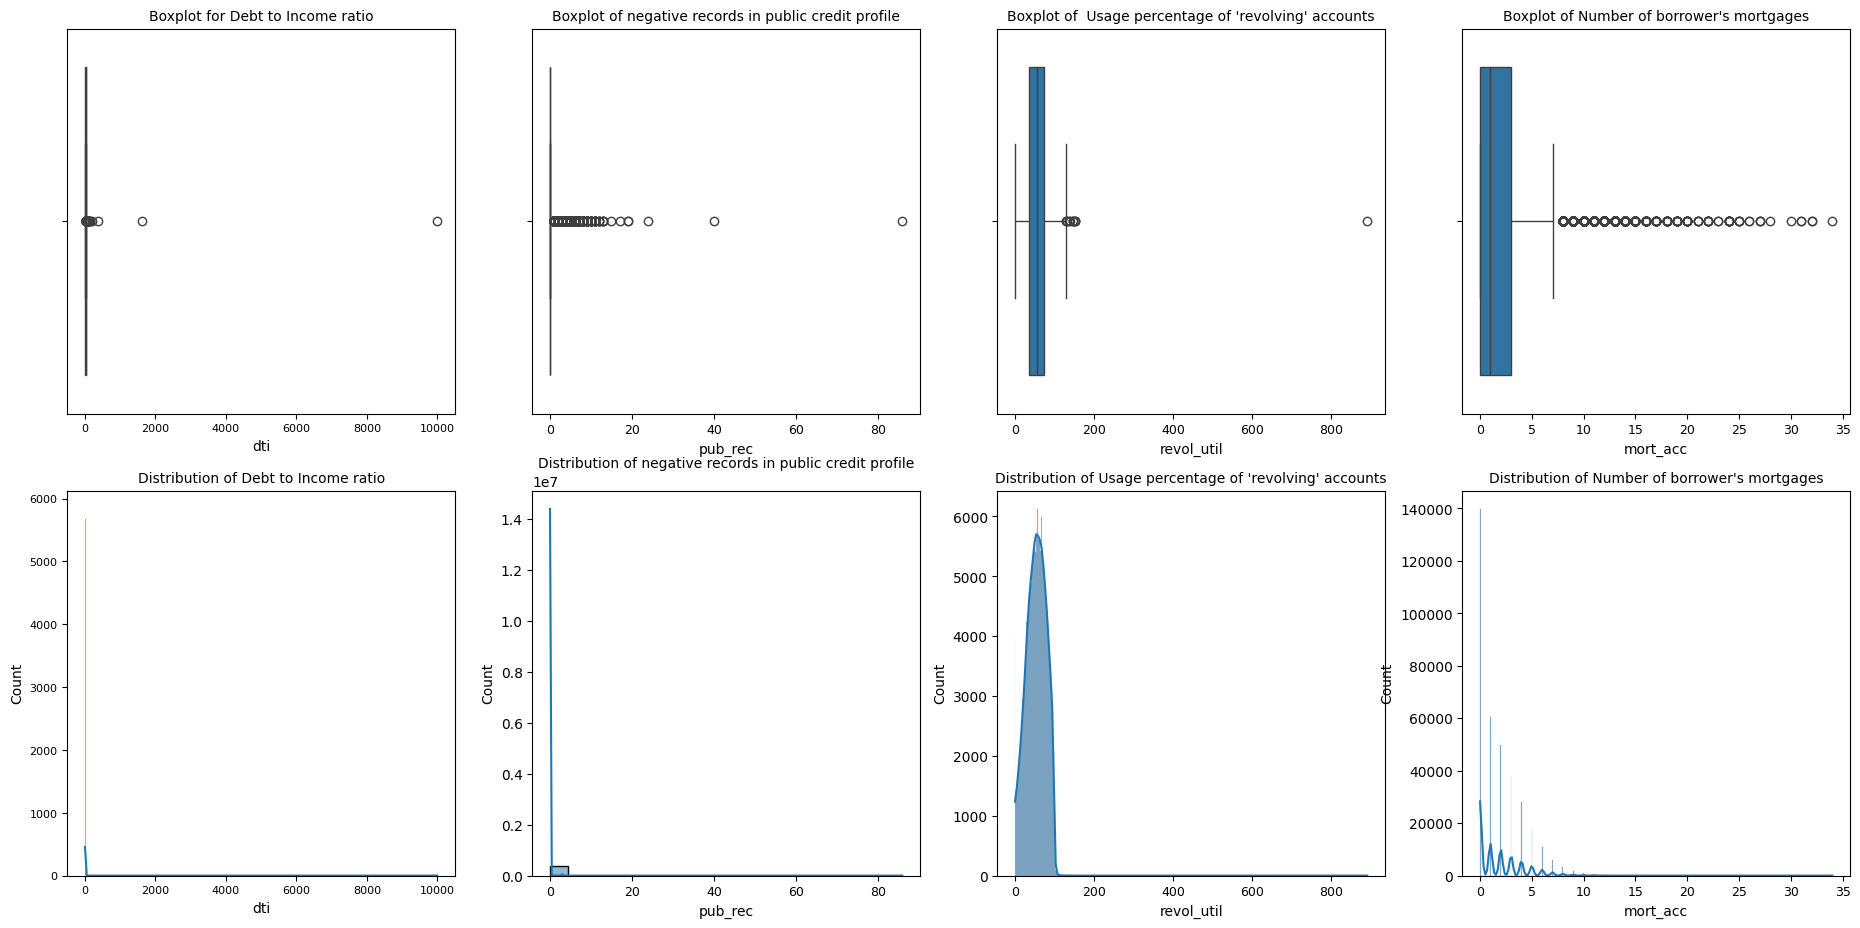

In [ ]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (23,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Debt to Income ratio",fontsize = 10)
sns.boxplot(data = df, x = 'dti')

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot of negative records in public credit profile",fontsize = 10)
sns.boxplot(data = df, x = 'pub_rec')

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot of  Usage percentage of 'revolving' accounts",fontsize = 10)
sns.boxplot(data = df, x = 'revol_util')

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot of Number of borrower's mortgages",fontsize = 10)
sns.boxplot(data = df, x = 'mort_acc')

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of Debt to Income ratio",fontsize = 10)
sns.histplot(data = df, x = 'dti', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Distribution of negative records in public credit profile",fontsize = 10)
sns.histplot(data = df, x = 'pub_rec', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Distribution of Usage percentage of 'revolving' accounts",fontsize = 10)
sns.histplot(data = df, x = 'revol_util', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Distribution of Number of borrower's mortgages",fontsize = 10)
sns.histplot(data = df, x = 'mort_acc', kde = True)

plt.show()

***Bivariate / Multivariate Analysis***

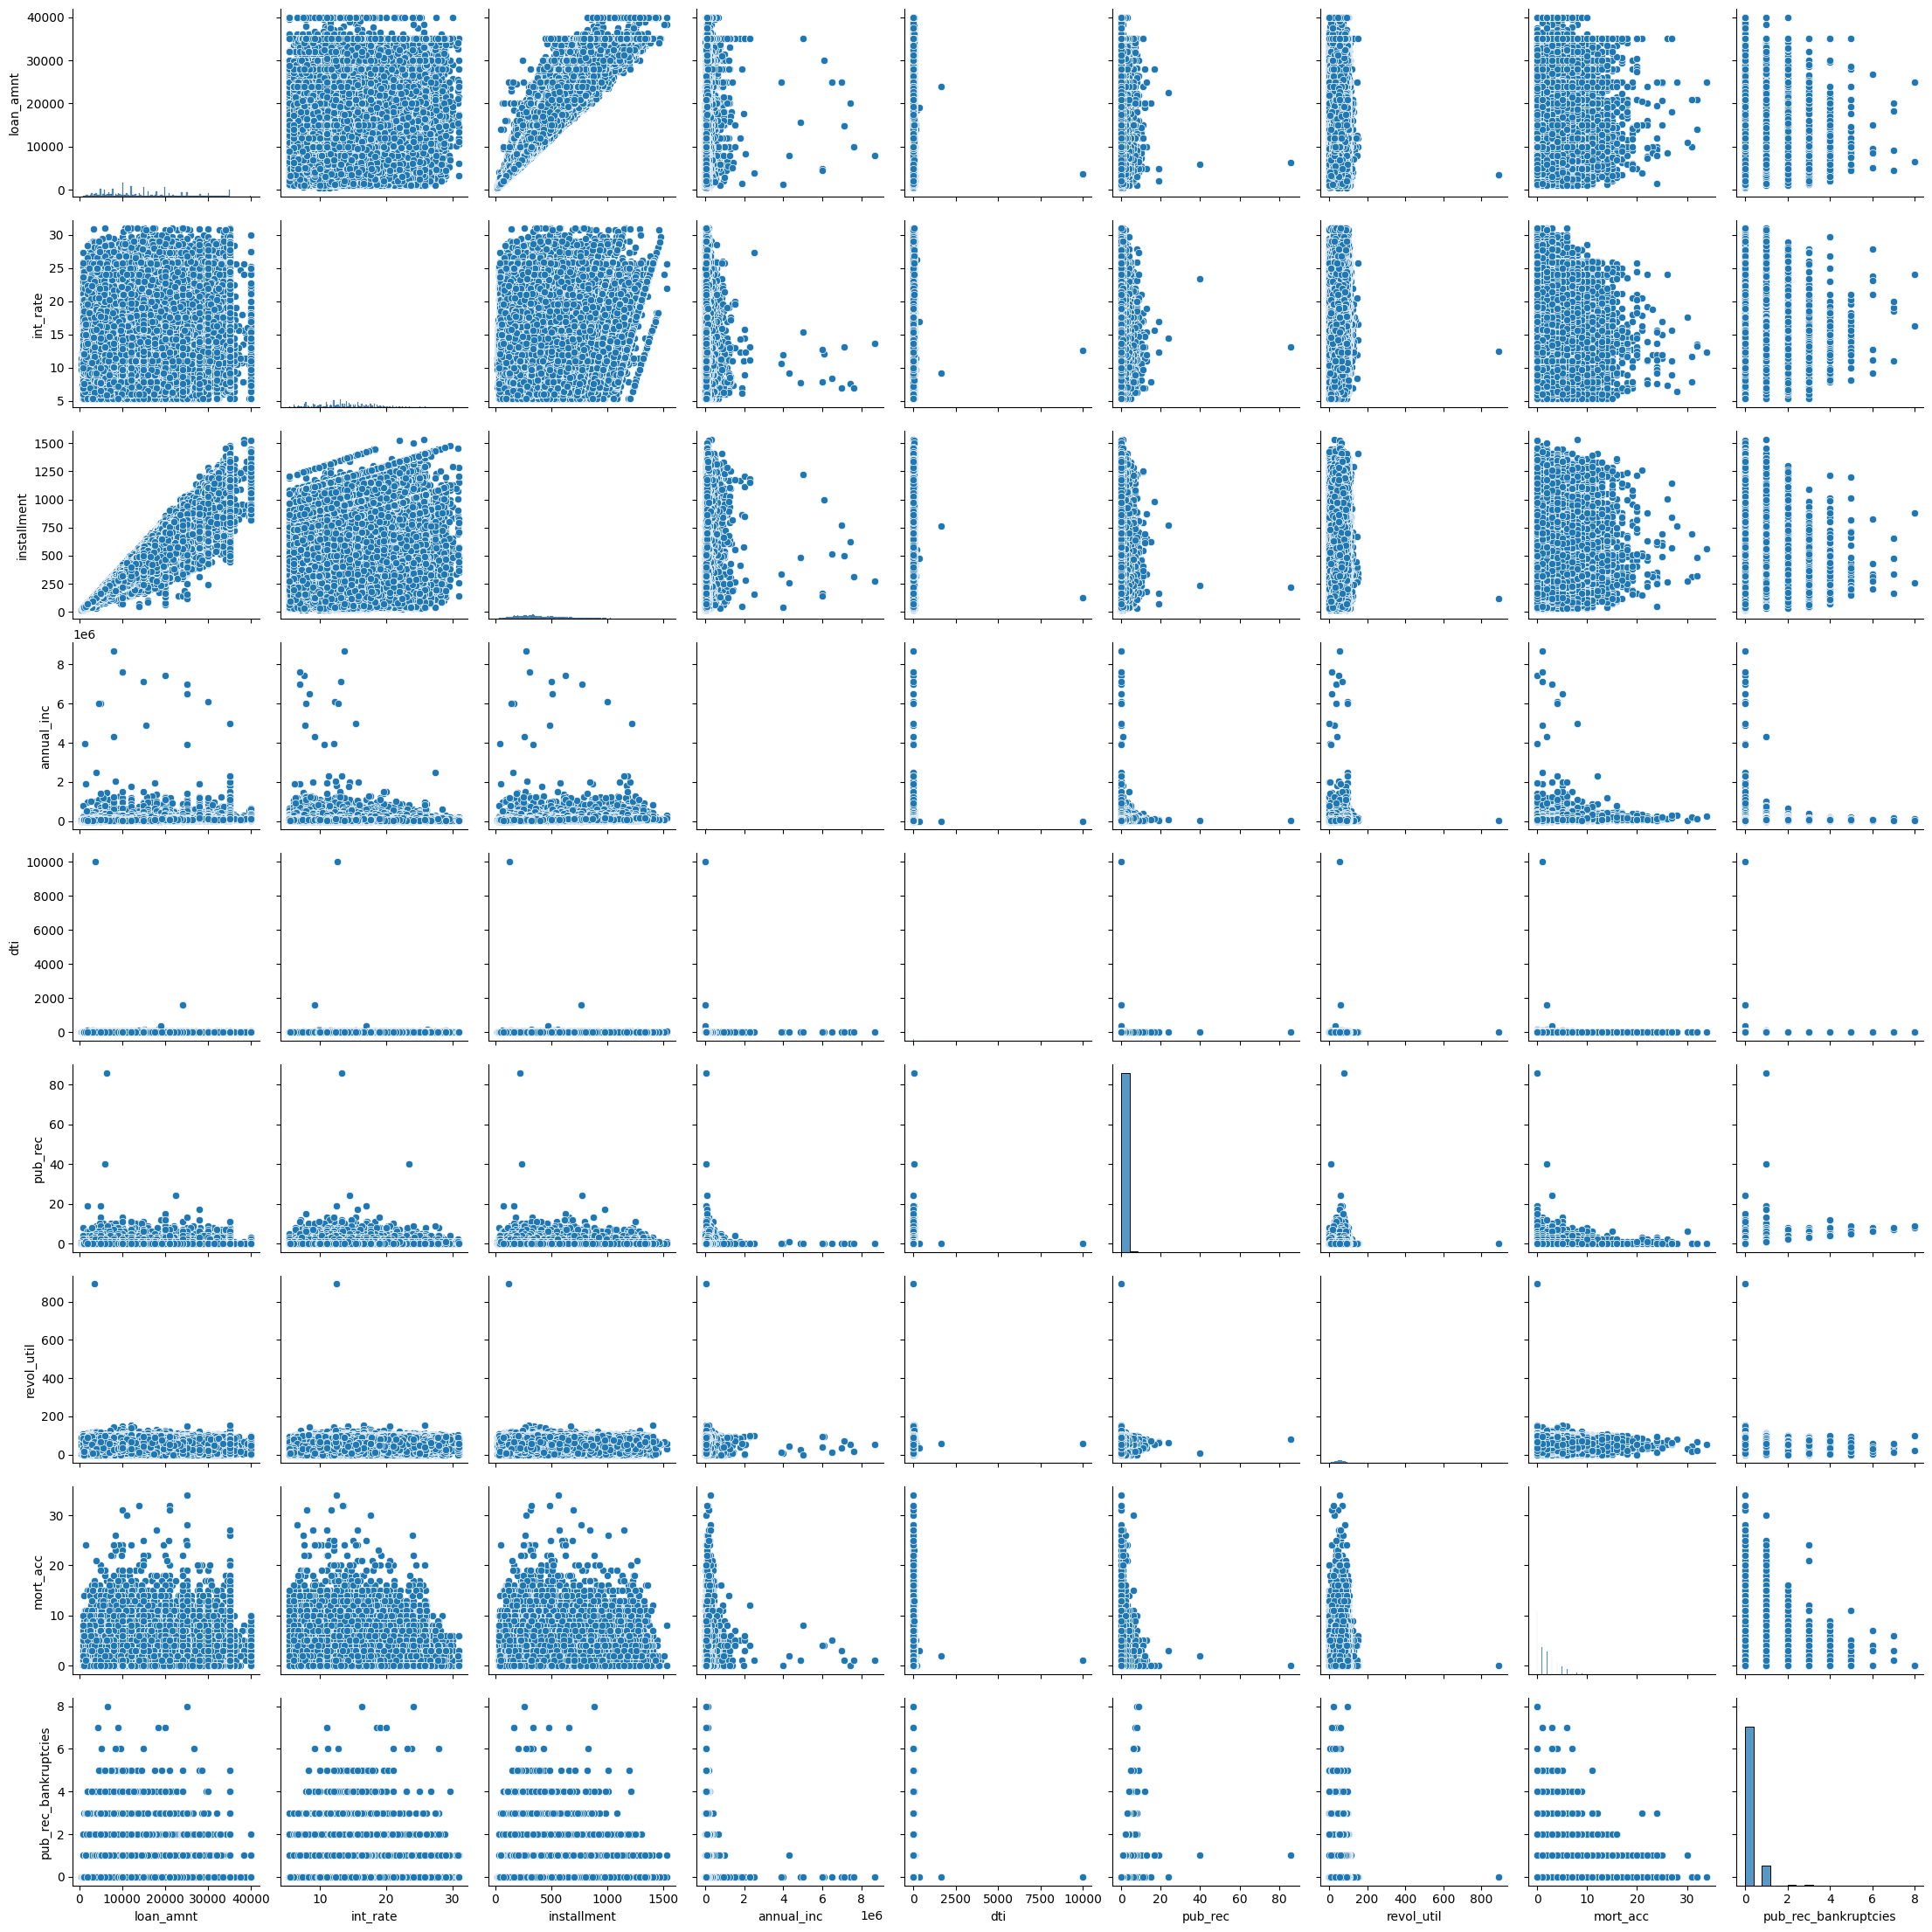

In [ ]:
# Using pairplot to find correlation between numerical data
sns.pairplot(data = df)
plt.show()

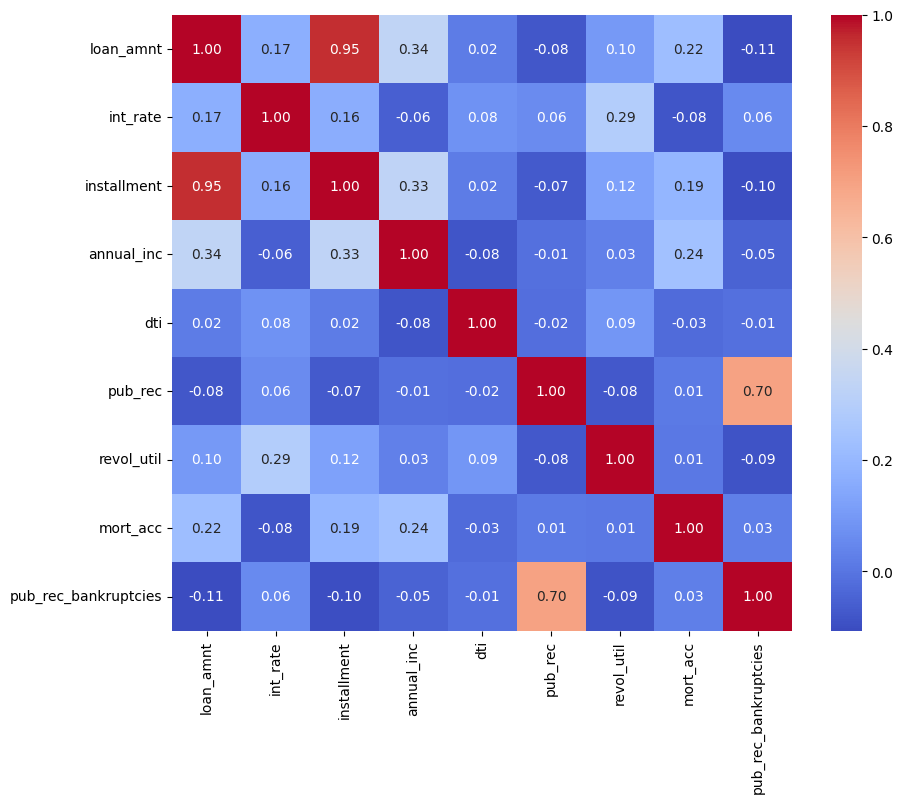

In [ ]:
# Using heatmap to identify correlation between numerical data

import seaborn as sns

# Compute the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()

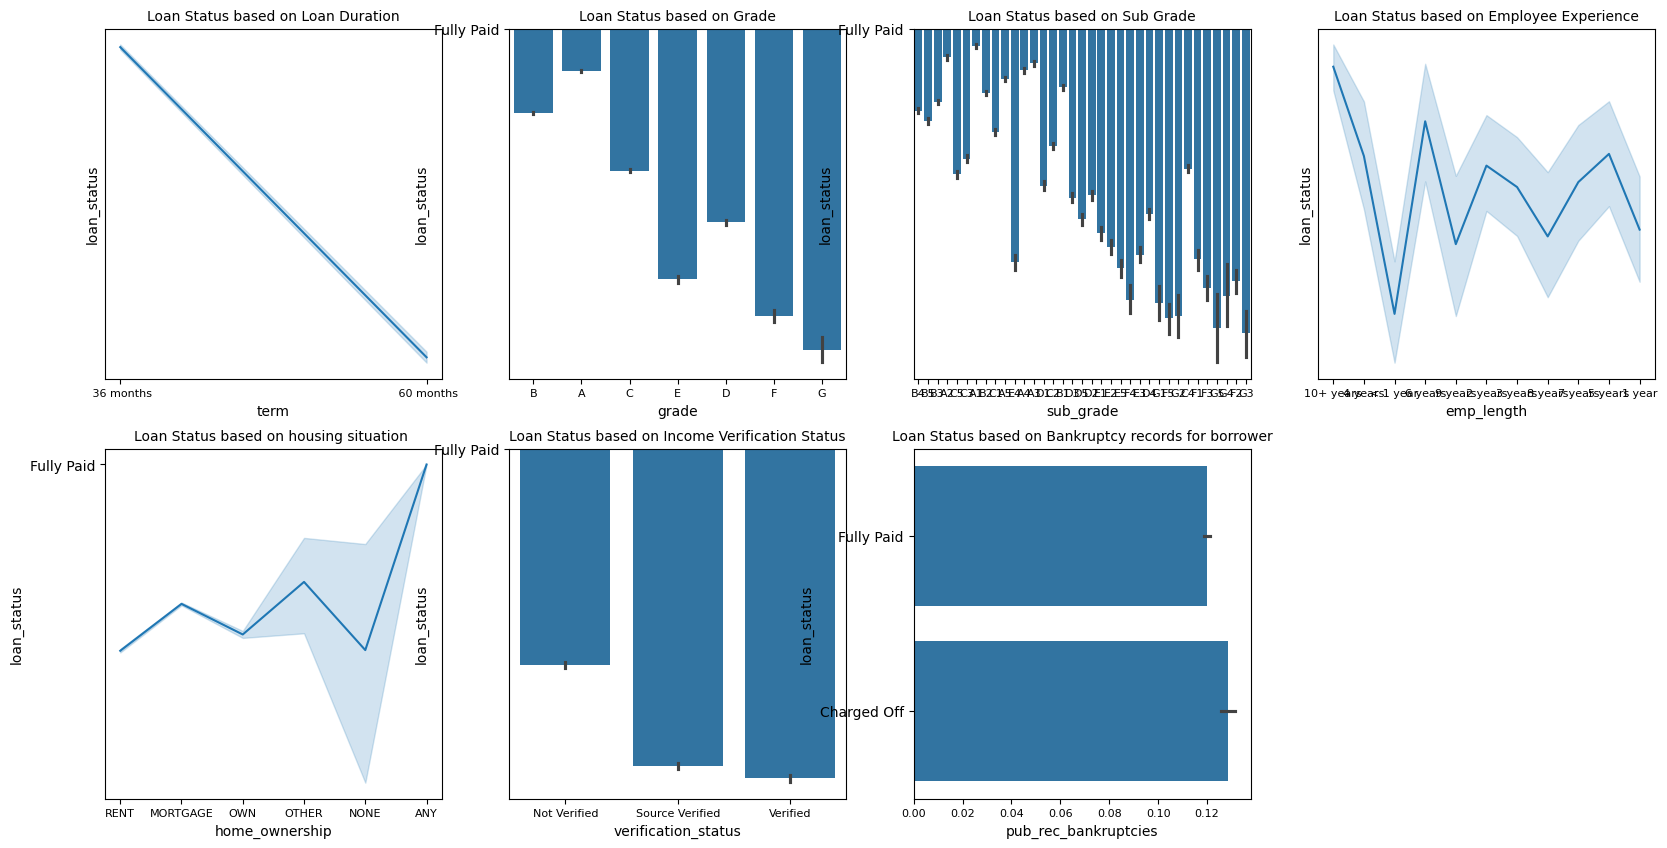

In [ ]:
# Plotting the Loan Status based on different categorical (discrete) variables
plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Loan Status based on Loan Duration",fontsize = 10)
sns.lineplot(data = df,x = 'term',y = 'loan_status')

plt.subplot(2,4,2)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Grade",fontsize = 10)
sns.barplot(data = df,x = 'grade',y = 'loan_status')

plt.subplot(2,4,3)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Sub Grade",fontsize = 10)
sns.barplot(data = df,x = 'sub_grade',y = 'loan_status')

plt.subplot(2,4,4)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Employee Experience",fontsize = 10)
sns.lineplot(data = df,x = 'emp_length',y = 'loan_status')

plt.subplot(2,4,5)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on housing situation ",fontsize = 10)
sns.lineplot(data = df,x = 'home_ownership',y = 'loan_status')

plt.subplot(2,4,6)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Income Verification Status",fontsize = 10)
sns.barplot(data = df,x = 'verification_status',y = 'loan_status')

plt.subplot(2,4,7)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Bankruptcy records for borrower",fontsize = 10)
sns.barplot(data = df,x = 'pub_rec_bankruptcies',y = 'loan_status')

plt.show()

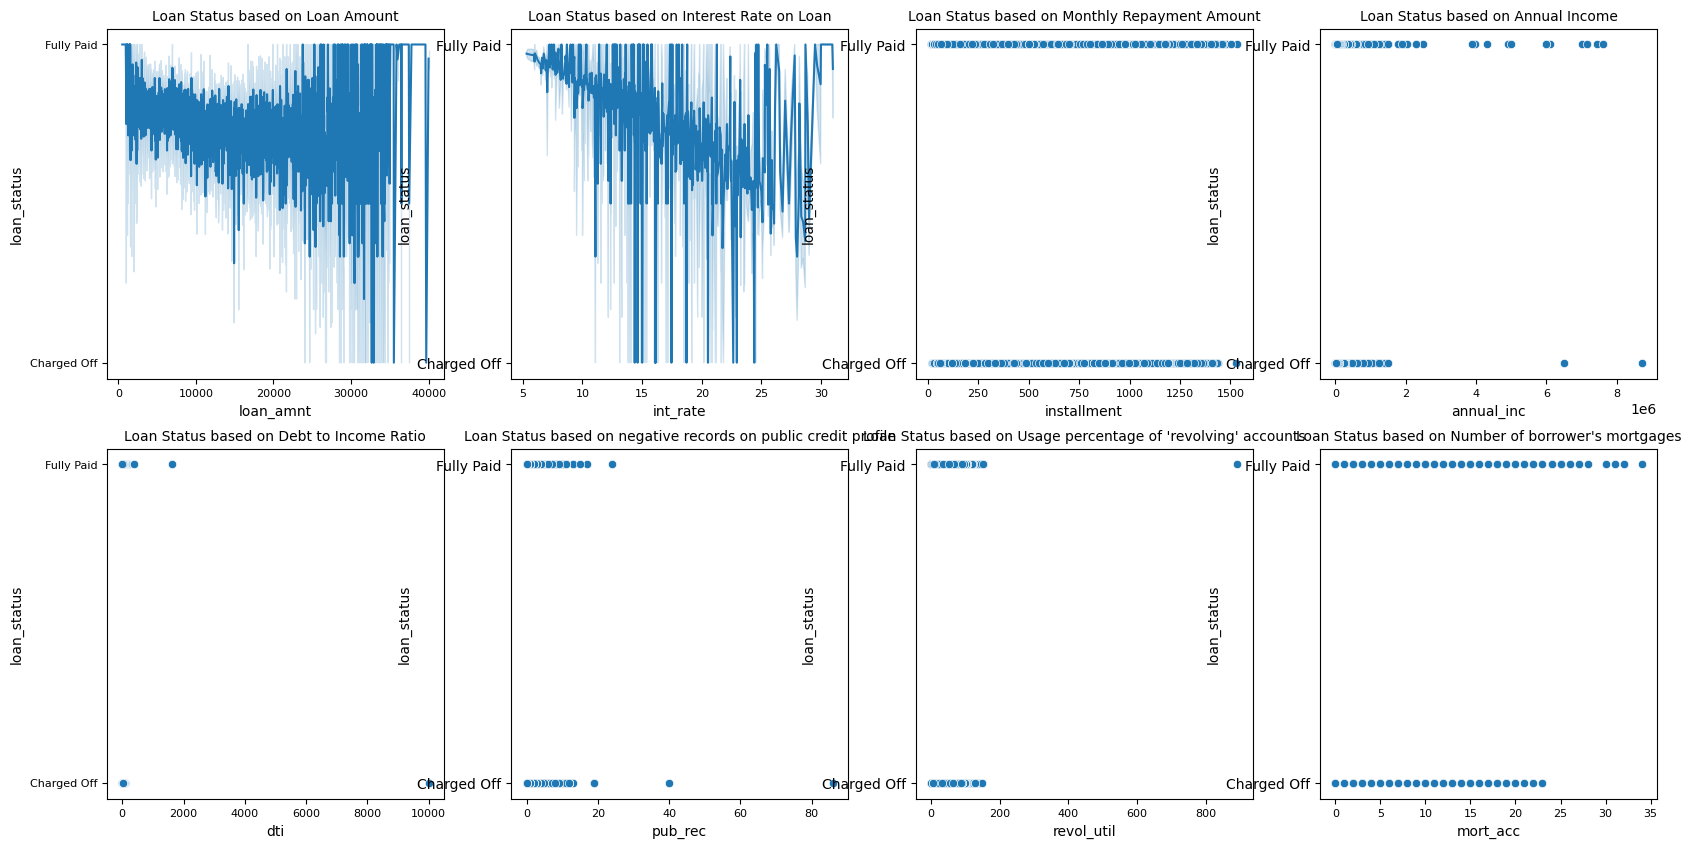

In [ ]:
# Plotting the Loan Status s based on different continuous variables

plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Loan Amount",fontsize = 10)
sns.lineplot(data = df,x = 'loan_amnt',y = 'loan_status')

plt.subplot(2,4,2)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Interest Rate on Loan",fontsize = 10)
sns.lineplot(data = df,x = 'int_rate',y = 'loan_status')

plt.subplot(2,4,3)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Monthly Repayment Amount",fontsize = 10)
sns.scatterplot(data = df,x = 'installment',y = 'loan_status')

plt.subplot(2,4,4)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Annual Income",fontsize = 10)
sns.scatterplot(data = df,x = 'annual_inc',y = 'loan_status')

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Debt to Income Ratio",fontsize = 10)
sns.scatterplot(data = df,x = 'dti',y = 'loan_status')

plt.subplot(2,4,6)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on negative records on public credit profile",fontsize = 10)
sns.scatterplot(data = df,x = 'pub_rec',y = 'loan_status')

plt.subplot(2,4,7)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Usage percentage of 'revolving' accounts",fontsize = 10)
sns.scatterplot(data = df,x = 'revol_util',y = 'loan_status')

plt.subplot(2,4,8)
plt.xticks(fontsize = 8)
plt.title("Loan Status based on Number of borrower's mortgages",fontsize = 10)
sns.scatterplot(data = df,x = 'mort_acc',y = 'loan_status')

plt.show()

***Comments***

**Univariate Analysis:**
* **Loan duration** is either 36 (3 yrs) or 60 months (5 yrs) - Majorly 3 yrs hence such a short term loan would be for motorcycle, other small items.
* **Grade assigned by CompanyX** is from A to G, large number of loans have B & C grade loans.
* **Home ownership** is categorized as
>* MORTGAGE - still paying off mortgage, high risk
>* RENT - rent, medium risk
>* OWN - mortgage if any, paid off, low risk
>* OTHER - enough information not available
>* NONE - enough information not available
>* ANY - enough information not available

* **Verification Status** for 2/3rd individuals is verified, about 1/3rd Not verified.
* **Loan status** is Fully Paid for most, and Charged off for some.
* **Initial List status** i.e. loan's first category is 1.5 times more with "f", then "w"
* Most **Loan application type** is Individual, followed by Joint, and Direct_pay
* **Bankrupcy records for borrower** (pub_rec_bankruptcies) is categorized between 0 to 8 from most with 0 and least with 8.




**Bivariate / Multivariate Analysis:**
>* All continuous variables are non normal hence outlier treatment will need to be done
>* As loan amount and interest rate is increasing, loan status being charged off is increasing and it's variance is also increasing

# ***2. Data Preprocessing***

**Data Preprocessing**

* Duplicate value check
* Missing value treatment
* Outlier treatment
* Feature engineering
* Data preparation for modeling

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0    10000.0   36 months     11.44       329.48     B        B4  10+ years   
1     8000.0   36 months     11.99       265.68     B        B5    4 years   
2    15600.0   36 months     10.49       506.97     B        B3   < 1 year   
3     7200.0   36 months      6.49       220.65     A        A2    6 years   
4    24375.0   60 months     17.27       609.33     C        C5    9 years   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT    117000.0        Not Verified  Jan-2015   Fully Paid   
1       MORTGAGE     65000.0        Not Verified  Jan-2015   Fully Paid   
2           RENT     43057.0     Source Verified  Jan-2015   Fully Paid   
3           RENT     54000.0        Not Verified  Nov-2014   Fully Paid   
4       MORTGAGE     55000.0            Verified  Apr-2013  Charged Off   

              purpose    dti earliest_cr_line  pub_rec  revol_util  mort_acc  \
0            vacation  26.24         Jun-1990      0.0        41.8       0.0   
1  debt_consolidation  22.05         Jul-2004      0.0        53.3       3.0   
2         credit_card  12.79         Aug-2007      0.0        92.2       0.0   
3         credit_card   2.60         Sep-2006      0.0        21.5       0.0   
4         credit_card  33.95         Mar-1999      0.0        69.8       1.0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'pub_rec', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

**Planning**

1. Duplicate Value Check
2. Missing Value treatment - emp_length, revol_util, mort_acc, pub_rec_bankruptcies
3. Convert Categorial data to Numerical
4. Outlier Treatment (Identify Normal vs Skewed Distributions)
5. Feature Engineering
6. Feature Scaling
7. Multicollinearity - Statsmodel VIF Remove features

***1) Duplicate Value Check***

In [ ]:
# Identifying duplicate data

df.duplicated().value_counts()

False    396030
Name: count, dtype: int64

**Comments**: There are no duplicate values in the dataset

***2) Missing Value Treatment***

In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['emp_length'].isnull().sum())
print("Percentage of missing values: ", (df['emp_length'].isnull().sum() / df.shape[0])*100)

Number of missing values:  18301
Percentage of missing values:  4.621114562028129


In [ ]:
# Deleting data with Null values for emp_length

df = df.drop(df[df['emp_length'].isnull() == True].index, axis = 0).reset_index()

In [ ]:
df.shape

(377729, 20)

In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['revol_util'].isnull().sum())
print("Percentage of missing values: ", (df['revol_util'].isnull().sum() / df.shape[0])*100)

Number of missing values:  265
Percentage of missing values:  0.07015611721631117


In [ ]:
# Deleting data with Null values for revol_util

df = df.drop(df[df['revol_util'].isnull() == True].index, axis = 0).reset_index()

In [ ]:
df.shape

(377464, 21)

In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['pub_rec_bankruptcies'].isnull().sum())
print("Percentage of missing values: ", (df['pub_rec_bankruptcies'].isnull().sum() / df.shape[0])*100)

Number of missing values:  535
Percentage of missing values:  0.14173537079032703


In [ ]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    335545
1.0     39213
2.0      1725
3.0       331
4.0        74
5.0        30
6.0         5
7.0         4
8.0         2
Name: count, dtype: int64

In [ ]:
# Adding 9.0 as a dummy value in place of pub_rec_bankruptcies

df['pub_rec_bankruptcies'].fillna(9.0, inplace = True)

In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['pub_rec_bankruptcies'].isnull().sum())
print("Percentage of missing values: ", (df['pub_rec_bankruptcies'].isnull().sum() / df.shape[0])*100)

Number of missing values:  0
Percentage of missing values:  0.0


In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['mort_acc'].isnull().sum())
print("Percentage of missing values: ", (df['mort_acc'].isnull().sum() / df.shape[0])*100)

Number of missing values:  36689
Percentage of missing values:  9.719867325095903


In [ ]:
# List of unique values in mortgage account column
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [ ]:
# Filling Null values in Mortagge account with a dummy value 99.0

df['mort_acc'].fillna(99.0, inplace = True)

In [ ]:
# Identifying number of missing values
print("Number of missing values: ", df['mort_acc'].isnull().sum())
print("Percentage of missing values: ", (df['mort_acc'].isnull().sum() / df.shape[0])*100)

Number of missing values:  0
Percentage of missing values:  0.0


In [ ]:
df.isnull().sum()

level_0                 0
index                   0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
pub_rec                 0
revol_util              0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

***3) Convert Categorical Data to Numerical Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377464 entries, 0 to 377463
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   level_0               377464 non-null  int64  
 1   index                 377464 non-null  int64  
 2   loan_amnt             377464 non-null  float64
 3   term                  377464 non-null  object 
 4   int_rate              377464 non-null  float64
 5   installment           377464 non-null  float64
 6   grade                 377464 non-null  object 
 7   sub_grade             377464 non-null  object 
 8   emp_length            377464 non-null  object 
 9   home_ownership        377464 non-null  object 
 10  annual_inc            377464 non-null  float64
 11  verification_status   377464 non-null  object 
 12  issue_d               377464 non-null  object 
 13  loan_status           377464 non-null  object 
 14  purpose               377464 non-null  object 
 15  

In [ ]:
df.head()

# term, grade, sub_grade, emp_length, home_ownership, verification_status, issue_d, loan_status, purpose - These columns need to be converted to numerical values

level_0  index  loan_amnt        term  int_rate  installment grade  \
0        0      0    10000.0   36 months     11.44       329.48     B   
1        1      1     8000.0   36 months     11.99       265.68     B   
2        2      2    15600.0   36 months     10.49       506.97     B   
3        3      3     7200.0   36 months      6.49       220.65     A   
4        4      4    24375.0   60 months     17.27       609.33     C   

  sub_grade emp_length home_ownership  ...  verification_status   issue_d  \
0        B4  10+ years           RENT  ...         Not Verified  Jan-2015   
1        B5    4 years       MORTGAGE  ...         Not Verified  Jan-2015   
2        B3   < 1 year           RENT  ...      Source Verified  Jan-2015   
3        A2    6 years           RENT  ...         Not Verified  Nov-2014   
4        C5    9 years       MORTGAGE  ...             Verified  Apr-2013   

   loan_status             purpose    dti  earliest_cr_line pub_rec  \
0   Fully Paid            vacation  26.24          Jun-1990     0.0   
1   Fully Paid  debt_consolidation  22.05          Jul-2004     0.0   
2   Fully Paid         credit_card  12.79          Aug-2007     0.0   
3   Fully Paid         credit_card   2.60          Sep-2006     0.0   
4  Charged Off         credit_card  33.95          Mar-1999     0.0   

   revol_util  mort_acc  pub_rec_bankruptcies  
0        41.8       0.0                   0.0  
1        53.3       3.0                   0.0  
2        92.2       0.0                   0.0  
3        21.5       0.0                   0.0  
4        69.8       1.0                   0.0  

[5 rows x 21 columns]

In [ ]:
# Unqiue values for term column
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# Stripping out the months from term column and converting to integer
df['term'] = df['term'].str.strip().str[:2].astype('int32')

In [ ]:
df['term'].dtypes

dtype('int32')

In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique() #Each of the 7 grades have 5 subgrades from 1 to 5 (total 35 subgrades)

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
# Replacing grades by integer values, A getting the highest weight of 7 and G getting the lowest weight

di = {"A" : 7, "B" : 6, "C" : 5, "D" : 4, "E" : 3, "F" : 2, "G" : 1}

df['grade'].replace(di , inplace=True)

In [ ]:
df['grade'].unique(), df['grade'].dtypes

(array([6, 7, 5, 3, 4, 2, 1]), dtype('int64'))

In [ ]:
# Replacing sub_grades by integer values 7.7 with the highest grade and 1.1 being lowest

df['sub_grade'] = df['sub_grade'].str.replace("A", "7.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("B", "6.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("C", "5.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("D", "4.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("E", "3.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("F", "2.", n=-1, case=None, regex=True)
df['sub_grade'] = df['sub_grade'].str.replace("G", "1.", n=-1, case=None, regex=True)

In [ ]:
# converting values in sub grade fromm object to float
df['sub_grade'] = df['sub_grade'].astype("float64")

In [ ]:
# checking unique values and data types of sub_grade column
df['sub_grade'].unique(), df['sub_grade'].dtypes

(array([6.4, 6.5, 6.3, 7.2, 5.5, 5.3, 7.1, 6.2, 5.1, 7.5, 3.4, 7.4, 7.3,
        4.1, 5.2, 6.1, 4.3, 4.5, 4.2, 3.1, 3.2, 3.5, 2.4, 3.3, 4.4, 1.1,
        2.5, 1.2, 5.4, 2.1, 2.3, 1.5, 1.4, 2.2, 1.3]),
 dtype('float64'))

In [ ]:
# unique values in employement length column

df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [ ]:
# Replacing employment length with years of experience: 10+ years considered 10 and < 1 years considered 0 years of experience.

di = {'10+ years' : 10,
      '9 years' : 9,
      '8 years' : 8,
      '7 years' : 7,
      '6 years' : 6,
      '5 years' : 5,
      '4 years' : 4,
      '3 years' : 3,
      '2 years' : 2,
      '1 year' : 1,
      '< 1 year' : 0}

df['emp_length'].replace(di , inplace=True)

In [ ]:
df['emp_length'].unique(), df['emp_length'].dtypes

(array([10,  4,  0,  6,  9,  2,  3,  8,  7,  5,  1]), dtype('int64'))

In [ ]:
# Unqiue values of verification status

df['verification_status'].value_counts()

verification_status
Source Verified    127694
Verified           126529
Not Verified       123241
Name: count, dtype: int64

In [ ]:
# Replacing verification status with either verified or not verified

di = {'Not Verified' : 0,
      'Source Verified' : 1,
      'Verified' : 1}

df['verification_status'].replace(di , inplace=True)

In [ ]:
df['verification_status'].unique(), df['verification_status'].dtypes

(array([0, 1]), dtype('int64'))

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
# Replacing loan status with 1 for Fully Paid and 0 for Charged Off

di = {'Charged Off' : 0,
      'Fully Paid' : 1}

df['loan_status'].replace(di , inplace=True)

In [ ]:
df['loan_status'].unique(), df['loan_status'].dtypes

(array([1, 0]), dtype('int64'))

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# Replacing loan status with 1 for Fully Paid and 0 for Charged Off

di = {'NONE' : 0,
      'MORTGAGE' : 1,
      'RENT' : 2,
      'OTHER' : 3,
      'ANY'  : 4,
      'OWN' : 5}

df['home_ownership'].replace(di , inplace=True)

df['home_ownership'].unique(), df['home_ownership'].dtypes

(array([2, 1, 5, 3, 0, 4]), dtype('int64'))

In [ ]:
# create a deep copy of df where purpose and issue dates are retained to extract information if needed as it will be dropped in original copy
df1 = df.copy()
df1.head()

level_0  index  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0      0    10000.0    36     11.44       329.48      6        6.4   
1        1      1     8000.0    36     11.99       265.68      6        6.5   
2        2      2    15600.0    36     10.49       506.97      6        6.3   
3        3      3     7200.0    36      6.49       220.65      7        7.2   
4        4      4    24375.0    60     17.27       609.33      5        5.5   

   emp_length  home_ownership  ...  verification_status   issue_d loan_status  \
0          10               2  ...                    0  Jan-2015           1   
1           4               1  ...                    0  Jan-2015           1   
2           0               2  ...                    1  Jan-2015           1   
3           6               2  ...                    0  Nov-2014           1   
4           9               1  ...                    1  Apr-2013           0   

              purpose    dti  earliest_cr_line pub_rec  revol_util  mort_acc  \
0            vacation  26.24          Jun-1990     0.0        41.8       0.0   
1  debt_consolidation  22.05          Jul-2004     0.0        53.3       3.0   
2         credit_card  12.79          Aug-2007     0.0        92.2       0.0   
3         credit_card   2.60          Sep-2006     0.0        21.5       0.0   
4         credit_card  33.95          Mar-1999     0.0        69.8       1.0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 21 columns]

In [ ]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [ ]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Feb-2014', 'Dec-2011', 'Mar-2013', 'Jun-2016',
       'Mar-2014', 'Nov-2013', 'Dec-2014', 'Sep-2013', 'May-2016',
       'Jul-2015', 'Jul-2013', 'Aug-2013', 'Aug-2014', 'May-2008',
       'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015', 'Sep-2011',
       'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012', 'Apr-2016',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Jun-2012', 'Aug-2012',
       'May-2015', 'Oct-2016', 'Aug-2015', 'Jul-2016', 'Feb-2016',
       'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013', 'Nov-2010',
       'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011', 'Aug-2010',
       'Jan-2016', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [ ]:
df.columns

Index(['level_0', 'index', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'pub_rec', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df.head()

level_0  index  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0      0    10000.0    36     11.44       329.48      6        6.4   
1        1      1     8000.0    36     11.99       265.68      6        6.5   
2        2      2    15600.0    36     10.49       506.97      6        6.3   
3        3      3     7200.0    36      6.49       220.65      7        7.2   
4        4      4    24375.0    60     17.27       609.33      5        5.5   

   emp_length  home_ownership  ...  verification_status   issue_d loan_status  \
0          10               2  ...                    0  Jan-2015           1   
1           4               1  ...                    0  Jan-2015           1   
2           0               2  ...                    1  Jan-2015           1   
3           6               2  ...                    0  Nov-2014           1   
4           9               1  ...                    1  Apr-2013           0   

              purpose    dti  earliest_cr_line pub_rec  revol_util  mort_acc  \
0            vacation  26.24          Jun-1990     0.0        41.8       0.0   
1  debt_consolidation  22.05          Jul-2004     0.0        53.3       3.0   
2         credit_card  12.79          Aug-2007     0.0        92.2       0.0   
3         credit_card   2.60          Sep-2006     0.0        21.5       0.0   
4         credit_card  33.95          Mar-1999     0.0        69.8       1.0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 21 columns]

In [ ]:
# Dropping columns "purpose", "issue_d", "subgrade", "earliest_cr_line" from the data frame

df.drop(["purpose", "issue_d"],axis = 1, inplace = True)

df.head()

level_0  index  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0      0    10000.0    36     11.44       329.48      6        6.4   
1        1      1     8000.0    36     11.99       265.68      6        6.5   
2        2      2    15600.0    36     10.49       506.97      6        6.3   
3        3      3     7200.0    36      6.49       220.65      7        7.2   
4        4      4    24375.0    60     17.27       609.33      5        5.5   

   emp_length  home_ownership  annual_inc  verification_status  loan_status  \
0          10               2    117000.0                    0            1   
1           4               1     65000.0                    0            1   
2           0               2     43057.0                    1            1   
3           6               2     54000.0                    0            1   
4           9               1     55000.0                    1            0   

     dti earliest_cr_line  pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0  26.24         Jun-1990      0.0        41.8       0.0                   0.0  
1  22.05         Jul-2004      0.0        53.3       3.0                   0.0  
2  12.79         Aug-2007      0.0        92.2       0.0                   0.0  
3   2.60         Sep-2006      0.0        21.5       0.0                   0.0  
4  33.95         Mar-1999      0.0        69.8       1.0                   0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377464 entries, 0 to 377463
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   level_0               377464 non-null  int64  
 1   index                 377464 non-null  int64  
 2   loan_amnt             377464 non-null  float64
 3   term                  377464 non-null  int32  
 4   int_rate              377464 non-null  float64
 5   installment           377464 non-null  float64
 6   grade                 377464 non-null  int64  
 7   sub_grade             377464 non-null  float64
 8   emp_length            377464 non-null  int64  
 9   home_ownership        377464 non-null  int64  
 10  annual_inc            377464 non-null  float64
 11  verification_status   377464 non-null  int64  
 12  loan_status           377464 non-null  int64  
 13  dti                   377464 non-null  float64
 14  earliest_cr_line      377464 non-null  object 
 15  

In [ ]:
df['earliest_cr_line'].nunique()

665

In [ ]:
# Dropping column "earliest_cr_line" from the data frame

df.drop(["earliest_cr_line"],axis = 1, inplace = True)

df.head()

level_0  index  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0      0    10000.0    36     11.44       329.48      6        6.4   
1        1      1     8000.0    36     11.99       265.68      6        6.5   
2        2      2    15600.0    36     10.49       506.97      6        6.3   
3        3      3     7200.0    36      6.49       220.65      7        7.2   
4        4      4    24375.0    60     17.27       609.33      5        5.5   

   emp_length  home_ownership  annual_inc  verification_status  loan_status  \
0          10               2    117000.0                    0            1   
1           4               1     65000.0                    0            1   
2           0               2     43057.0                    1            1   
3           6               2     54000.0                    0            1   
4           9               1     55000.0                    1            0   

     dti  pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0  26.24      0.0        41.8       0.0                   0.0  
1  22.05      0.0        53.3       3.0                   0.0  
2  12.79      0.0        92.2       0.0                   0.0  
3   2.60      0.0        21.5       0.0                   0.0  
4  33.95      0.0        69.8       1.0                   0.0

In [ ]:
df.drop(["level_0", "index"],axis = 1, inplace = True)

In [ ]:
# All columns are now numerical

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377464 entries, 0 to 377463
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             377464 non-null  float64
 1   term                  377464 non-null  int32  
 2   int_rate              377464 non-null  float64
 3   installment           377464 non-null  float64
 4   grade                 377464 non-null  int64  
 5   sub_grade             377464 non-null  float64
 6   emp_length            377464 non-null  int64  
 7   home_ownership        377464 non-null  int64  
 8   annual_inc            377464 non-null  float64
 9   verification_status   377464 non-null  int64  
 10  loan_status           377464 non-null  int64  
 11  dti                   377464 non-null  float64
 12  pub_rec               377464 non-null  float64
 13  revol_util            377464 non-null  float64
 14  mort_acc              377464 non-null  float64
 15  

***4) Outlier Treatment (Idenitfy Normal vs Skewed Distributions***

Continuous Numerical Data : loan_amnt, int_rate, installment, annual_inc, dti, pub_rec, revol_util, mort_acc

Following columns are non normal (skewed) hence outlier treatment is needed to convert them to normal distribution

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'dti', 'pub_rec', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

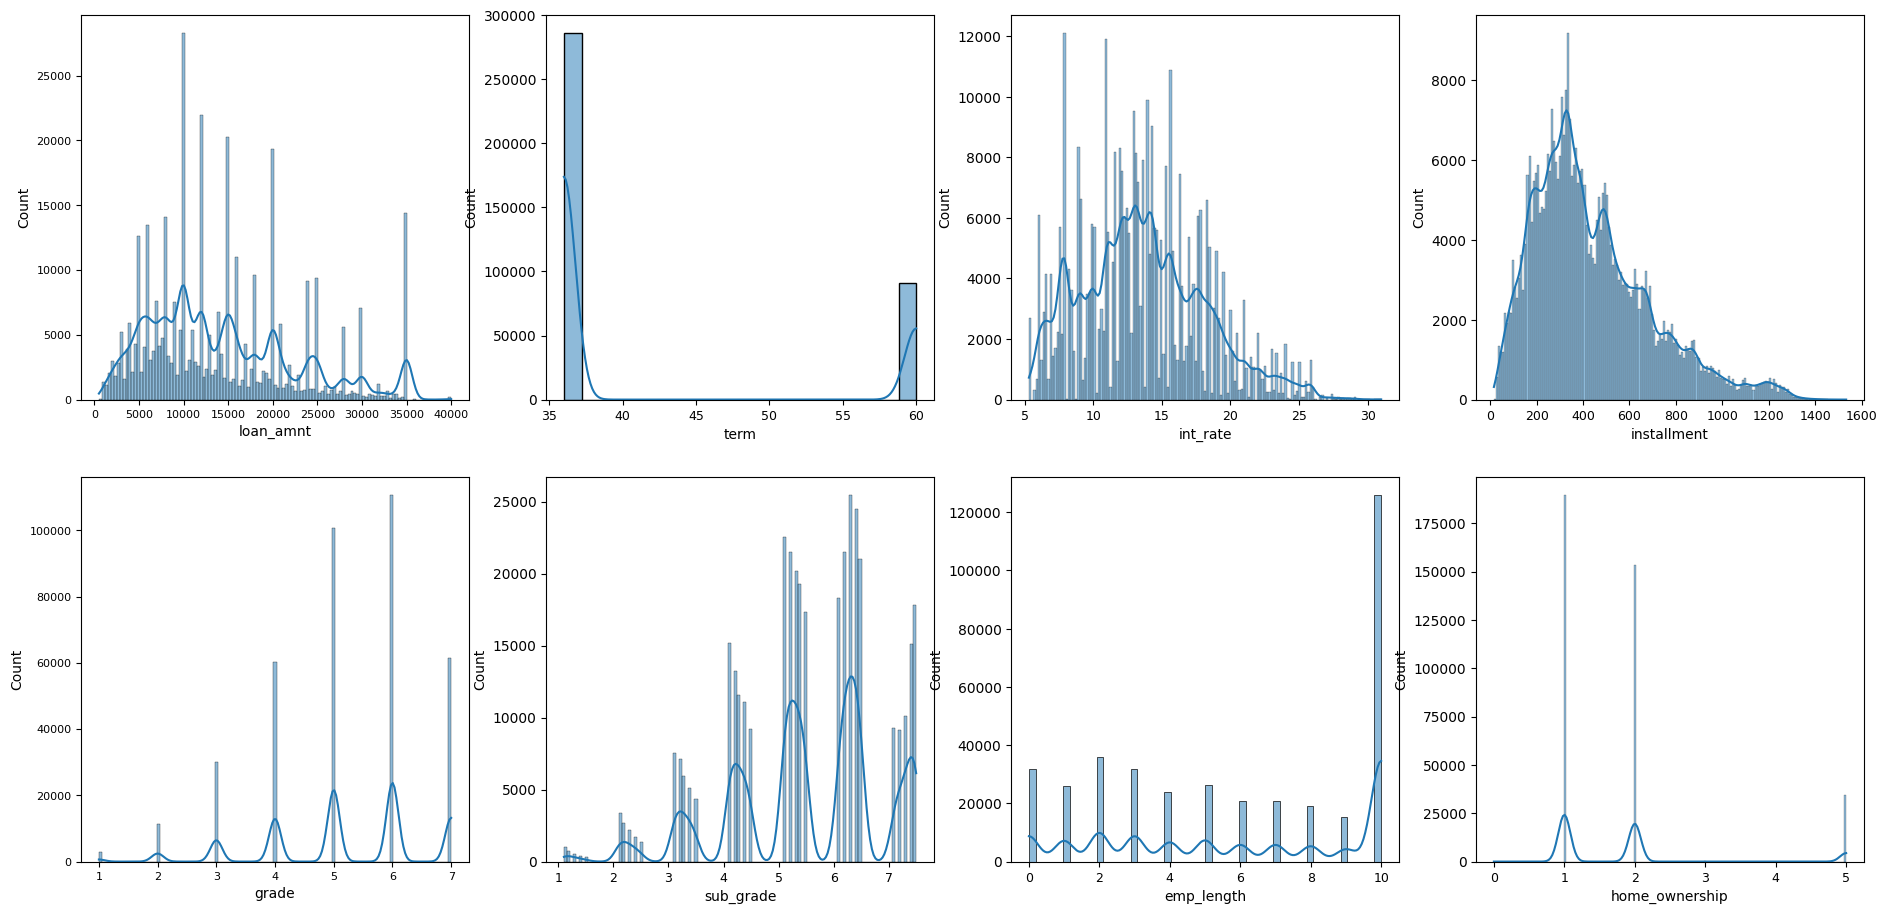

In [ ]:
plt.figure(figsize = (23,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
#plt.title("Distribution of Debt to Income ratio",fontsize = 10)
sns.histplot(data = df, x = 'loan_amnt', kde = True)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
#plt.title("Distribution of negative records in public credit profile",fontsize = 10)
sns.histplot(data = df, x = 'term', kde = True)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Usage percentage of 'revolving' accounts",fontsize = 10)
sns.histplot(data = df, x = 'int_rate', kde = True)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Number of borrower's mortgages",fontsize = 10)
sns.histplot(data = df, x = 'installment', kde = True)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
#plt.title("Distribution of Debt to Income ratio",fontsize = 10)
sns.histplot(data = df, x = 'grade', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
#plt.title("Distribution of negative records in public credit profile",fontsize = 10)
sns.histplot(data = df, x = 'sub_grade', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Usage percentage of 'revolving' accounts",fontsize = 10)
sns.histplot(data = df, x = 'emp_length', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Number of borrower's mortgages",fontsize = 10)
sns.histplot(data = df, x = 'home_ownership', kde = True)

plt.show()

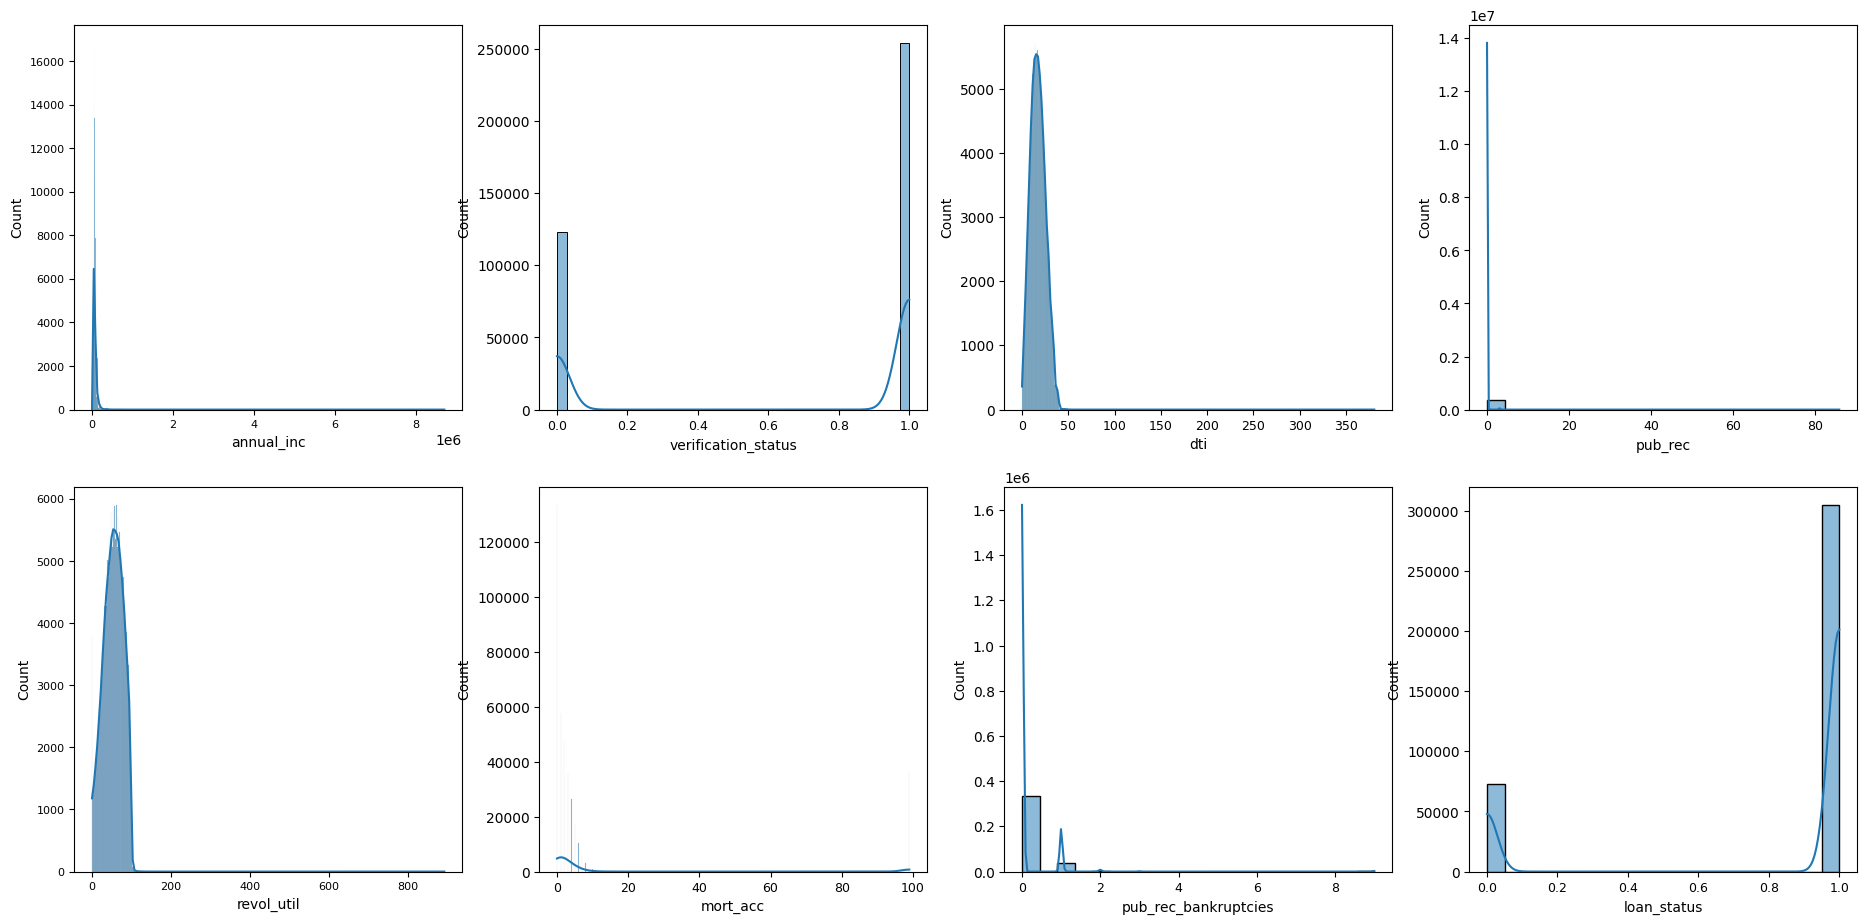

In [ ]:
plt.figure(figsize = (23,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
#plt.title("Distribution of Debt to Income ratio",fontsize = 10)
sns.histplot(data = df, x = 'annual_inc', kde = True)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
#plt.title("Distribution of negative records in public credit profile",fontsize = 10)
sns.histplot(data = df, x = 'verification_status', kde = True)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Usage percentage of 'revolving' accounts",fontsize = 10)
sns.histplot(data = df, x = 'dti', kde = True)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Number of borrower's mortgages",fontsize = 10)
sns.histplot(data = df, x = 'pub_rec', kde = True)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
#plt.title("Distribution of Debt to Income ratio",fontsize = 10)
sns.histplot(data = df, x = 'revol_util', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
#plt.title("Distribution of negative records in public credit profile",fontsize = 10)
sns.histplot(data = df, x = 'mort_acc', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Usage percentage of 'revolving' accounts",fontsize = 10)
sns.histplot(data = df, x = 'pub_rec_bankruptcies', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
#plt.title("Distribution of Number of borrower's mortgages",fontsize = 10)
sns.histplot(data = df, x = 'loan_status', kde = True)

plt.show()

loan_amnt, int_rate, installment, annual_inc, dti, pub_rec, revol_util, mort_acc

In [ ]:
df.describe()

loan_amnt           term       int_rate    installment  \
count  377464.000000  377464.000000  377464.000000  377464.000000   
mean    14258.217340      41.807028      13.633391     435.703356   
std      8373.707336      10.278491       4.474202     251.184304   
min       500.000000      36.000000       5.320000      16.080000   
25%      8000.000000      36.000000      10.390000     254.030000   
50%     12000.000000      36.000000      13.330000     379.390000   
75%     20000.000000      36.000000      16.490000     572.762500   
max     40000.000000      60.000000      30.990000    1533.810000   

               grade     sub_grade     emp_length  home_ownership  \
count  377464.000000  377464.00000  377464.000000   377464.000000   
mean        5.179728       5.47699       5.938802        1.770505   
std         1.335232       1.36402       3.645574        1.126383   
min         1.000000       1.10000       0.000000        0.000000   
25%         4.000000       4.40000       3.000000        1.000000   
50%         5.000000       5.50000       6.000000        1.000000   
75%         6.000000       6.40000      10.000000        2.000000   
max         7.000000       7.50000      10.000000        5.000000   

         annual_inc  verification_status    loan_status            dti  \
count  3.774640e+05        377464.000000  377464.000000  377464.000000   
mean   7.539042e+04             0.673503       0.807727      17.287411   
std    6.230825e+04             0.468932       0.394087       8.113775   
min    4.000000e+03             0.000000       0.000000       0.000000   
25%    4.600000e+04             0.000000       1.000000      11.260000   
50%    6.500000e+04             1.000000       1.000000      16.840000   
75%    9.000000e+04             1.000000       1.000000      22.880000   
max    8.706582e+06             1.000000       1.000000     380.530000   

             pub_rec     revol_util       mort_acc  pub_rec_bankruptcies  
count  377464.000000  377464.000000  377464.000000         377464.000000  
mean        0.172408      53.943566      11.252480              0.129790  
std         0.524681      24.432862      28.863808              0.484228  
min         0.000000       0.000000       0.000000              0.000000  
25%         0.000000      36.000000       0.000000              0.000000  
50%         0.000000      55.000000       1.000000              0.000000  
75%         0.000000      73.000000       4.000000              0.000000  
max        86.000000     892.300000      99.000000              9.000000

In [ ]:
df['loan_amnt'].quantile(q = 0.25), df['loan_amnt'].quantile(q = 0.75)

(8000.0, 20000.0)

In [ ]:
# IQR values for loan_amnt
print(f" Min, Max : {df['loan_amnt'].min(), df['loan_amnt'].max()}")

x = df['loan_amnt'].quantile(q = 0.25) # 25th percentile
y = df['loan_amnt'].quantile(q = 0.75) # 75th percentile
z = df['loan_amnt'].quantile(q = 0.50) # 50th percentile
IQR = y - x
th_min = x - 1.5*IQR
th_max = y + 1.5*IQR

print(f" Min Threshold, Maximum Threshold : {th_min, th_max}")

 Min, Max : (500.0, 40000.0)
 Min Threshold, Maximum Threshold : (-10000.0, 38000.0)


In [ ]:
#Outlier treatment for loan_amnt
df['loan_amnt'] = df['loan_amnt'].apply(lambda x : z if x > y else x )
print(f" Min, Max : {df['loan_amnt'].min(), df['loan_amnt'].max()}")

 Min, Max : (500.0, 20000.0)


In [ ]:
# Number of values greater than max threshold
df[(df['loan_amnt'] > th_max) == True].shape[0]

0

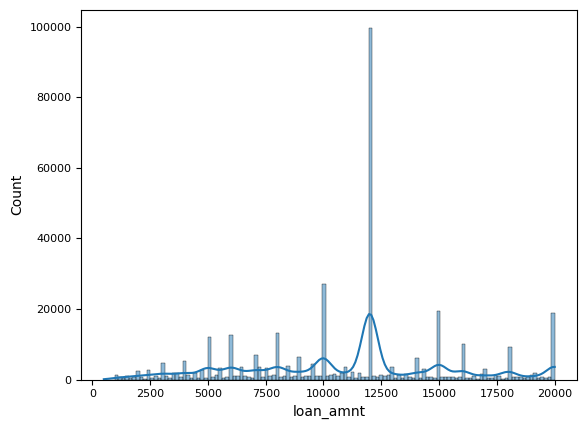

In [ ]:
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
sns.histplot(data = df, x = 'loan_amnt', kde = True)

plt.show()

In [ ]:
# Creating a deep copy of df
df2 = df.copy()
df2.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0    36     11.44       329.48      6        6.4          10   
1     8000.0    36     11.99       265.68      6        6.5           4   
2    15600.0    36     10.49       506.97      6        6.3           0   
3     7200.0    36      6.49       220.65      7        7.2           6   
4    12000.0    60     17.27       609.33      5        5.5           9   

   home_ownership  annual_inc  verification_status  loan_status    dti  \
0               2    117000.0                    0            1  26.24   
1               1     65000.0                    0            1  22.05   
2               2     43057.0                    1            1  12.79   
3               2     54000.0                    0            1   2.60   
4               1     55000.0                    1            0  33.95   

   pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0      0.0        41.8       0.0                   0.0  
1      0.0        53.3       3.0                   0.0  
2      0.0        92.2       0.0                   0.0  
3      0.0        21.5       0.0                   0.0  
4      0.0        69.8       1.0                   0.0

In [ ]:
def detect_outliers(df):
  for feature in df.columns:
    # Min Max value
    print(f" Min, Max for {feature} : {df[feature].min(), df[feature].max()}")

    # Percentile
    v_25 = df[feature].quantile(q = 0.25) # 25th percentile
    v_75 = df[feature].quantile(q = 0.75) # 75th percentile
    v_50 = df[feature].quantile(q = 0.50) # 50th percentile

    # IQR Calculation
    IQR = v_75 - v_25
    th_min = round(v_25 - 1.5*IQR,4)
    th_max = round(v_75 + 1.5*IQR,4)
    print(f" Min Threshold, Maximum Threshold for {feature} : {th_min, th_max}")
    if (df[feature].min() >= th_min) & (df[feature].max() <= th_max):
      print("Outliers are NOT present!!")
    else:
      print("Outliers are present!!")
    print("*************************************************************************")

In [ ]:
detect_outliers(df)

 Min, Max for loan_amnt : (500.0, 20000.0)
 Min Threshold, Maximum Threshold for loan_amnt : (-400.0, 22000.0)
Outliers are NOT present!!
*************************************************************************
 Min, Max for term : (36, 60)
 Min Threshold, Maximum Threshold for term : (36.0, 36.0)
Outliers are present!!
*************************************************************************
 Min, Max for int_rate : (5.32, 30.99)
 Min Threshold, Maximum Threshold for int_rate : (1.24, 25.64)
Outliers are present!!
*************************************************************************
 Min, Max for installment : (16.08, 1533.81)
 Min Threshold, Maximum Threshold for installment : (-224.0688, 1050.8613)
Outliers are present!!
*************************************************************************
 Min, Max for grade : (1, 7)
 Min Threshold, Maximum Threshold for grade : (1.0, 9.0)
Outliers are NOT present!!
*************************************************************************


In [ ]:
def treat_outliers(df):
  # Percentile
  v_25 = df[feature].quantile(q = 0.25) # 25th percentile
  v_75 = df[feature].quantile(q = 0.75) # 75th percentile
  v_50 = df[feature].quantile(q = 0.50) # 50th percentile

  for feature in df.columns:
    # Outlier treatment for loan_amnt
    df[feature] = df[feature].apply(lambda x : v_50 if x > v_75 else x )
    print(f" Min, Max : {df[feature].min(), df[feature].max()}")

In [ ]:
# List of continuous numerical data in original dataset
num_con

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc']

In [ ]:
# Plotting Histogram for Continuous Variables
import numpy as np
import matplotlib.pyplot as plt

def histplot(df):
  for feature in df.columns:
    # Skipping non-numeric features for histogram plotting
    if df[feature].dtype == 'object':
        continue

    # Calculate mean, median, and mode
    mean = df[feature].mean()  # Fill in the blank to calculate mean
    median = df[feature].median()  # Fill in the blank to calculate median
    mode = df[feature].mode().get(0, np.nan)  # Fill in the blank to calculate mode

    # Create the histogram
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=20, alpha=0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mean
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2)  # Fill in the blank to plot median
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mode

    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color = 'red')  # Fill in the blank to annotate mean
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color = 'green')  # Fill in the blank to annotate median
    plt.text(mode, plt.ylim()[1] * 0.85, f'Mode: {mode:.2f}', color = 'blue')  # Fill in the blank to annotate mode

    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

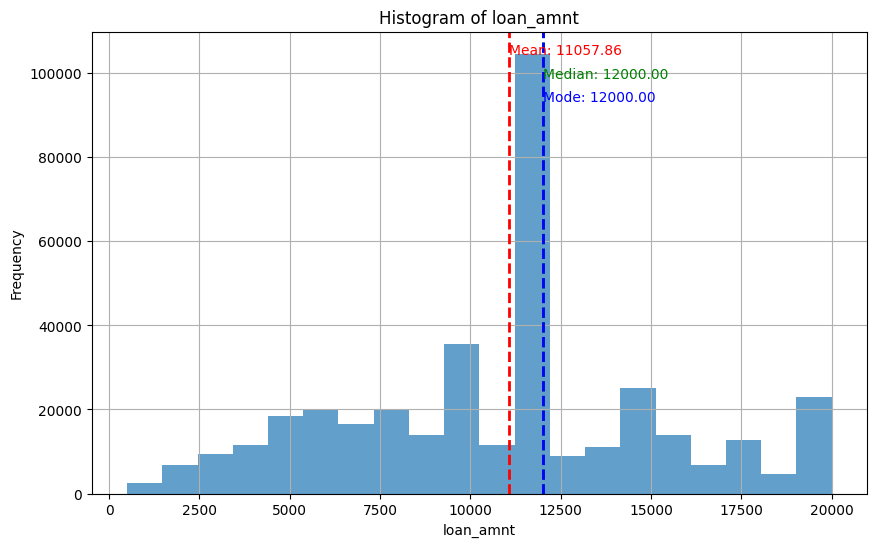

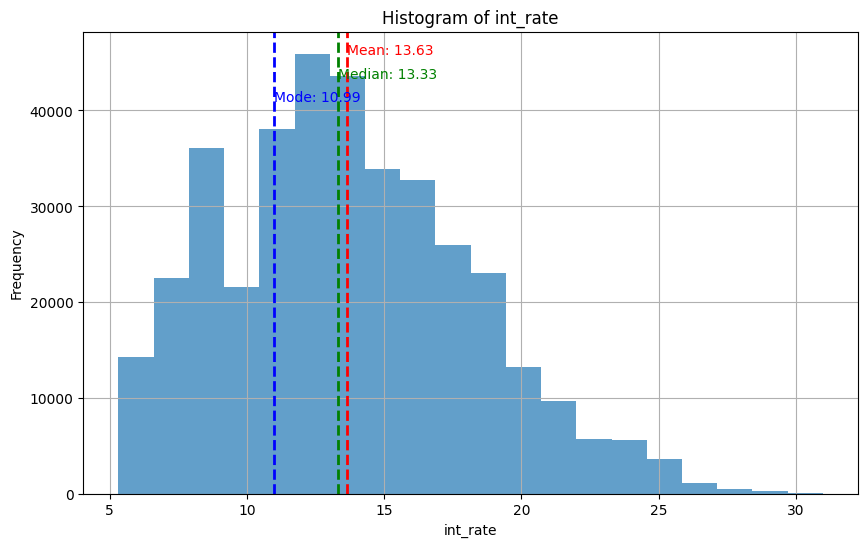

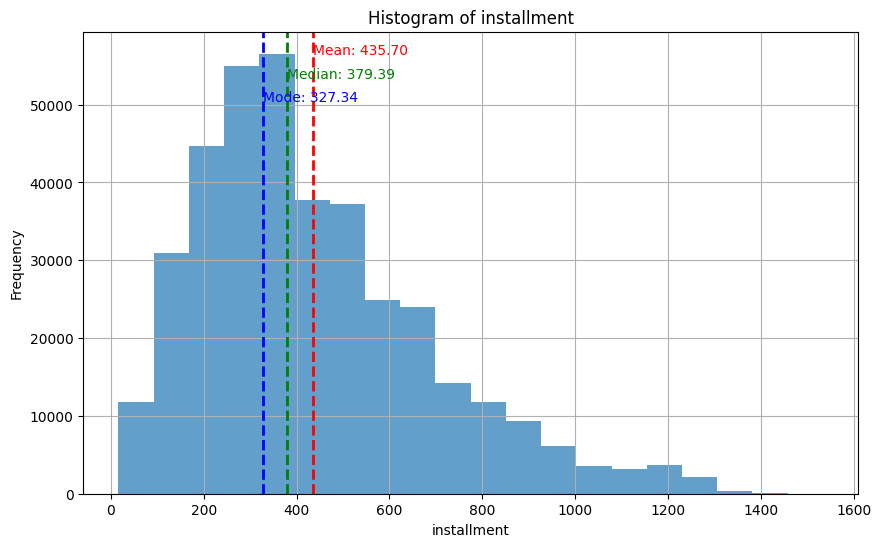

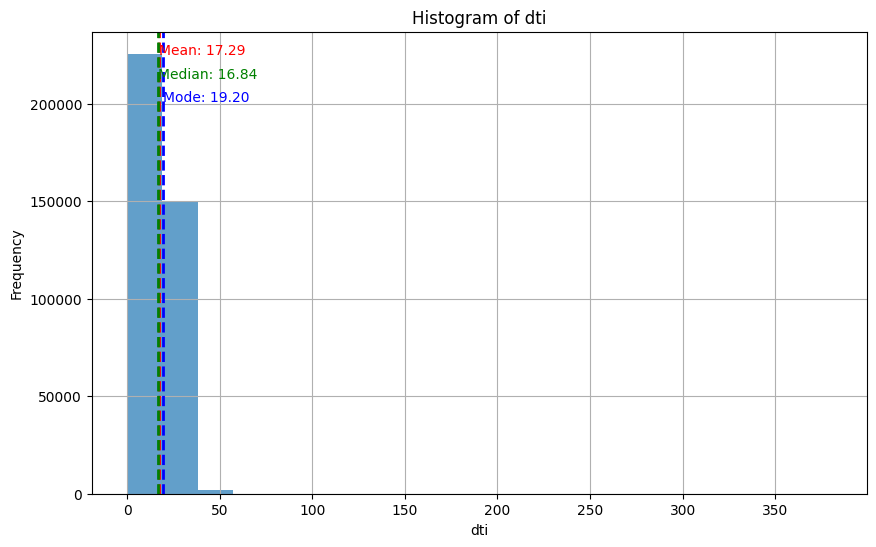

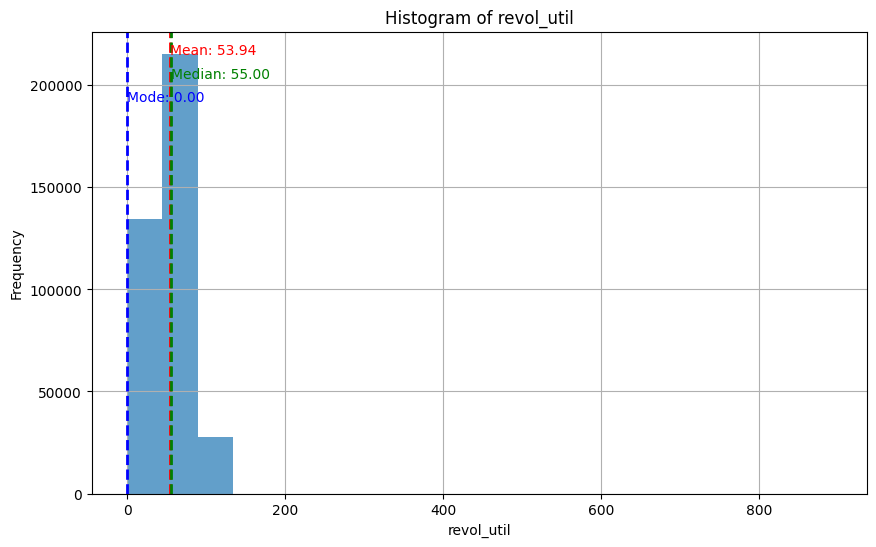

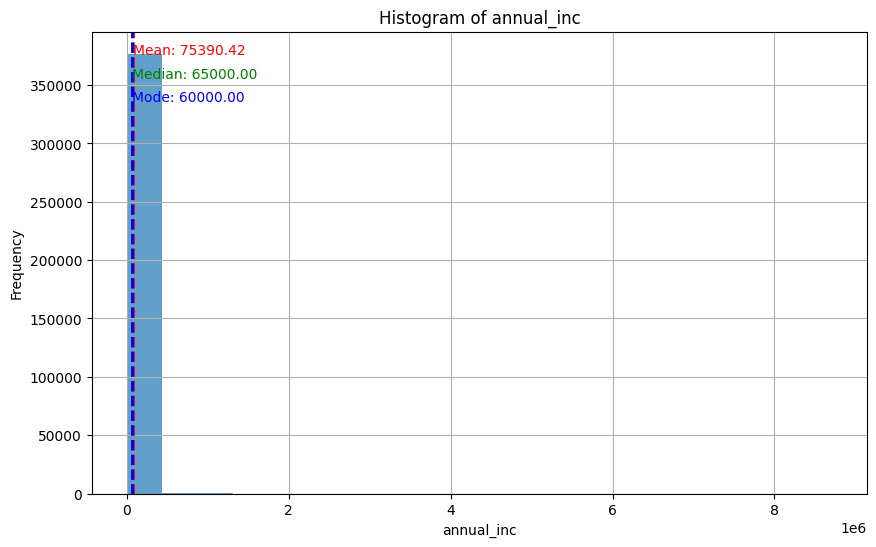

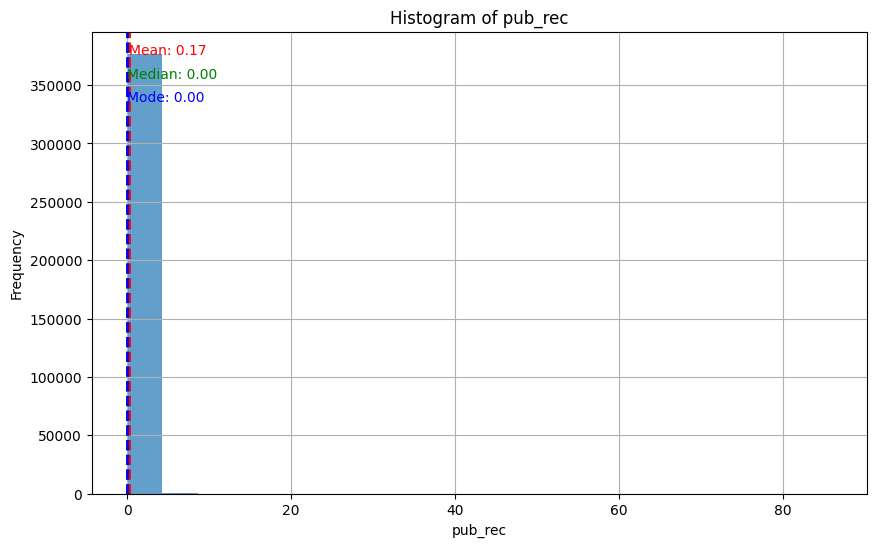

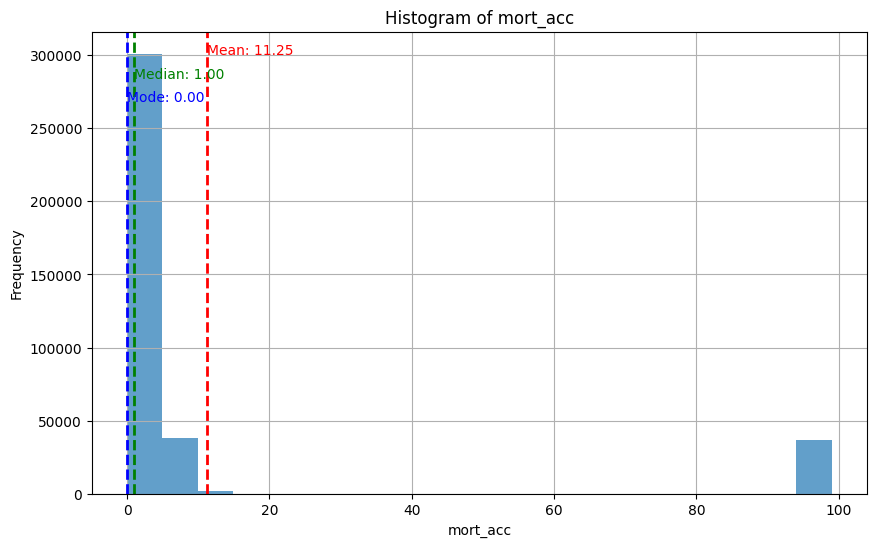

In [ ]:
histplot(df[['loan_amnt','int_rate','installment','dti','revol_util','annual_inc','pub_rec','mort_acc']])

**Outlier treatment for interest rates**

In [ ]:
# Outlier treatment for interest rates

detect_outliers(df[['int_rate']])

 Min, Max for int_rate : (5.32, 30.99)
 Min Threshold, Maximum Threshold for int_rate : (1.24, 25.64)
Outliers are present!!
*************************************************************************


In [ ]:
df[df['int_rate'] > 25.64].shape, df.shape

((2993, 16), (377464, 16))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers(df, feature):
    # Percentile
    v_25 = df[feature].quantile(q = 0.25) # 25th percentile
    v_75 = df[feature].quantile(q = 0.75) # 75th percentile
    v_50 = df[feature].quantile(q = 0.50) # 50th percentile

    # IQR Calculation
    IQR = v_75 - v_25
    th_min = round(v_25 - 1.5*IQR,4)
    th_max = round(v_75 + 1.5*IQR,4)

    # Box plot with outliers
    sns.boxplot(df[feature])
    plt.title(f'Original Box Plot of {feature}')
    plt.show()

    # Removing Outliers
    removed_outliers = df[df[feature] <= th_max]

    # Box plot after outliers removal
    sns.boxplot(removed_outliers[feature])
    plt.title(f'Box Plot without Outliers of {feature}')
    plt.show()
    return removed_outliers

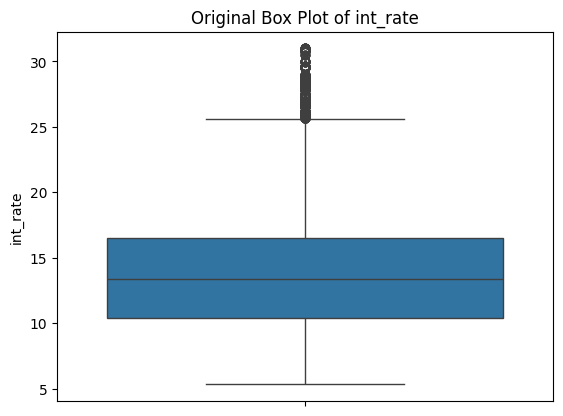

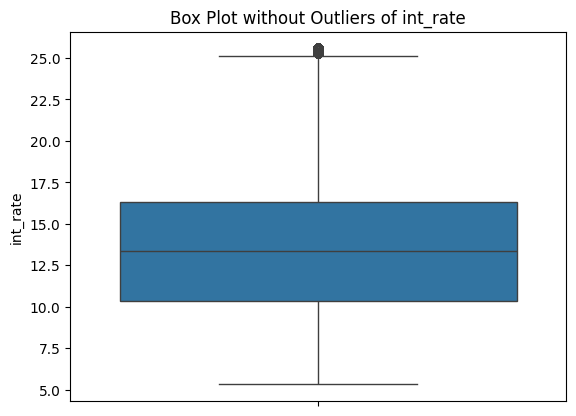

In [ ]:
no_outliers = remove_outliers(df, 'int_rate')

In [ ]:
df = no_outliers

df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0    36     11.44       329.48      6        6.4          10   
1     8000.0    36     11.99       265.68      6        6.5           4   
2    15600.0    36     10.49       506.97      6        6.3           0   
3     7200.0    36      6.49       220.65      7        7.2           6   
4    12000.0    60     17.27       609.33      5        5.5           9   

   home_ownership  annual_inc  verification_status  loan_status    dti  \
0               2    117000.0                    0            1  26.24   
1               1     65000.0                    0            1  22.05   
2               2     43057.0                    1            1  12.79   
3               2     54000.0                    0            1   2.60   
4               1     55000.0                    1            0  33.95   

   pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0      0.0        41.8       0.0                   0.0  
1      0.0        53.3       3.0                   0.0  
2      0.0        92.2       0.0                   0.0  
3      0.0        21.5       0.0                   0.0  
4      0.0        69.8       1.0                   0.0

In [ ]:
df[df['int_rate'] > 25.64].shape, df.shape

((0, 16), (374471, 16))

**Outlier Treatment for installment**

In [ ]:
# Detect outliers
detect_outliers(df[['installment']])

 Min, Max for installment : (16.08, 1527.0)
 Min Threshold, Maximum Threshold for installment : (-222.585, 1045.935)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['installment'] > 1045.935].shape, df.shape

((10434, 16), (374471, 16))

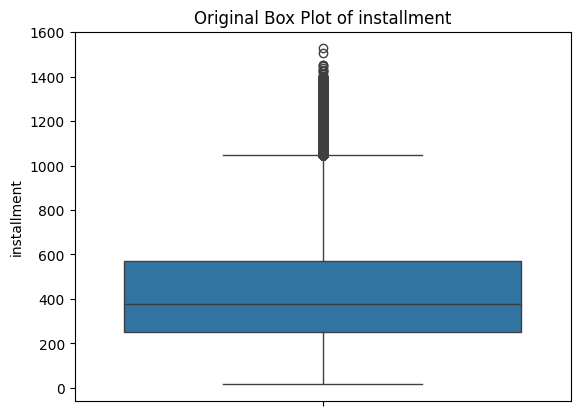

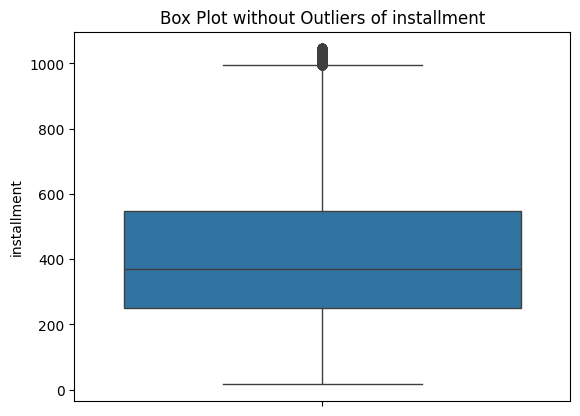

In [ ]:
# Remove outliers from dataset
df = remove_outliers(df, 'installment')

In [ ]:
df[df['installment'] > 1045.935].shape, df.shape

((0, 16), (364037, 16))

**Outlier treatment for dti**

In [ ]:
# Detect outliers
detect_outliers(df[['dti']])

 Min, Max for dti : (0.0, 380.53)
 Min Threshold, Maximum Threshold for dti : (-6.195, 40.325)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['dti'] > 40.315].shape, df.shape

((209, 16), (364037, 16))

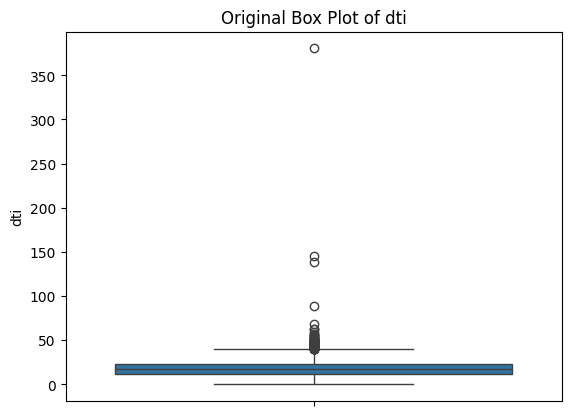

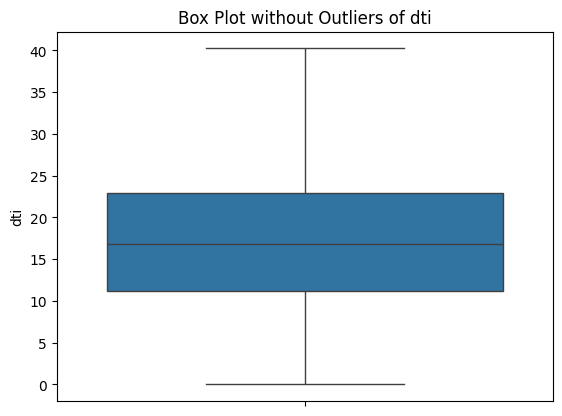

In [ ]:
# Remove outliers from dataset
df = remove_outliers(df, 'dti')

In [ ]:
# Check shape of df
df[df['dti'] > 40.315].shape, df.shape

((0, 16), (363828, 16))

**Outlier treatment for revol_util**

In [ ]:
# Detect outliers
detect_outliers(df[['revol_util']])

 Min, Max for revol_util : (0.0, 892.3)
 Min Threshold, Maximum Threshold for revol_util : (-19.45, 128.15)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['revol_util'] > 128.3].shape, df.shape

((10, 16), (363828, 16))

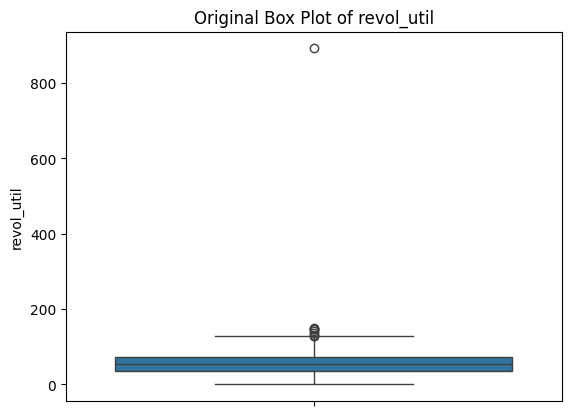

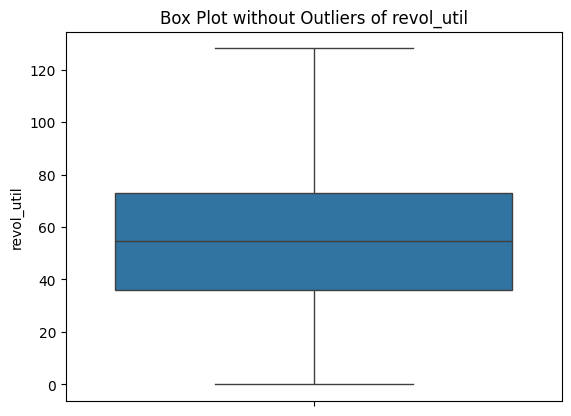

In [ ]:
# Remove outliers from dataset
df = remove_outliers(df, 'revol_util')

In [ ]:
# Check shape of df
df[df['revol_util'] > 128.3].shape, df.shape

((0, 16), (363818, 16))

**Outlier treatment for Annual Income**

In [ ]:
# Detect outliers
detect_outliers(df[['annual_inc']])

 Min, Max for annual_inc : (4000.0, 8706582.0)
 Min Threshold, Maximum Threshold for annual_inc : (-20306.25, 154583.75)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['annual_inc'] > 154700.0].shape, df.shape

((14567, 16), (363818, 16))

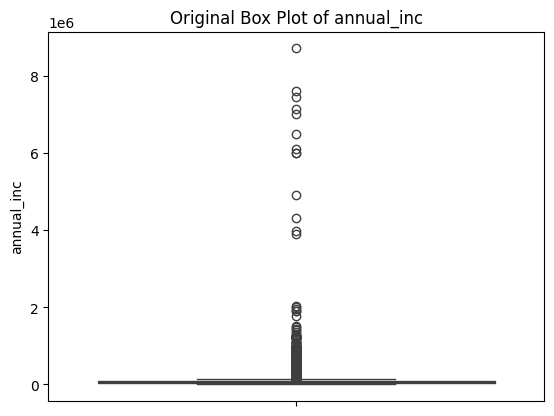

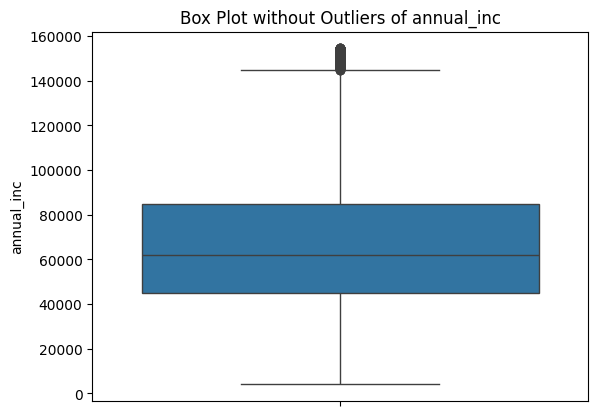

In [ ]:
# Remove outliers from dataset
df = remove_outliers(df, 'annual_inc')

In [ ]:
# Check shape of df
df[df['annual_inc'] > 154700.0].shape, df.shape

((0, 16), (349249, 16))

**Outlier treatment for public record**

In [ ]:
# Detect outliers
detect_outliers(df[['pub_rec']])

 Min, Max for pub_rec : (0.0, 86.0)
 Min Threshold, Maximum Threshold for pub_rec : (0.0, 0.0)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['pub_rec'] > 8.0].shape, df.shape

((35, 16), (349249, 16))

In [ ]:
df['pub_rec'].value_counts()

pub_rec
0.0     299017
1.0      43549
2.0       4655
3.0       1241
4.0        411
5.0        183
6.0         93
7.0         40
8.0         25
9.0          9
10.0         8
11.0         5
13.0         3
12.0         3
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

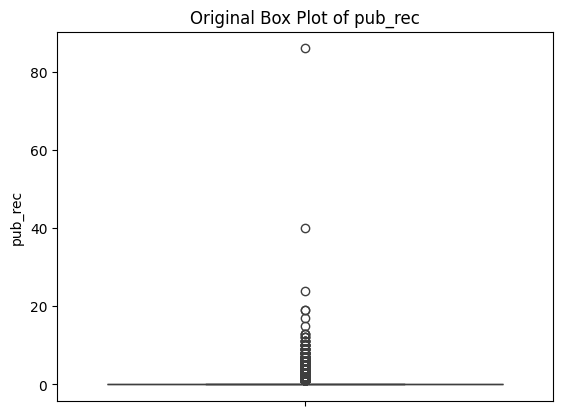

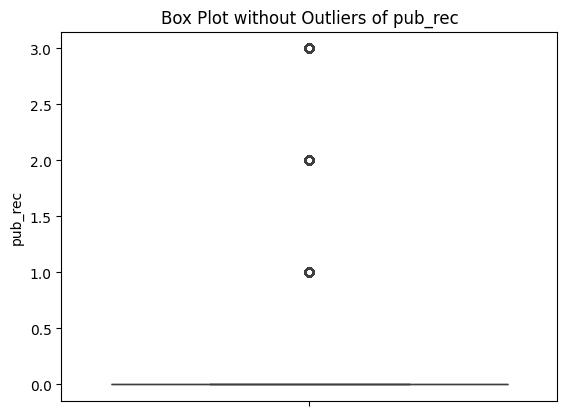

In [ ]:
# Remove outliers from dataset for values greater than 3.0

# df = remove_outliers(df, 'pub_rec')

# Box plot with outliers
sns.boxplot(df['pub_rec'])
plt.title(f'Original Box Plot of pub_rec')
plt.show()

# Removing Outliers
removed_outliers = df[df['pub_rec'] <= 3.0]

# Box plot after outliers removal
sns.boxplot(removed_outliers['pub_rec'])
plt.title(f'Box Plot without Outliers of pub_rec')
plt.show()

df = removed_outliers

**Outlier treatment for mort_acc**

In [ ]:
# Detect outliers
detect_outliers(df[['mort_acc']])

 Min, Max for mort_acc : (0.0, 99.0)
 Min Threshold, Maximum Threshold for mort_acc : (-6.0, 10.0)
Outliers are present!!
*************************************************************************


In [ ]:
# Check shape of df
df[df['mort_acc'] > 10.0].shape, df.shape

((35828, 16), (348462, 16))

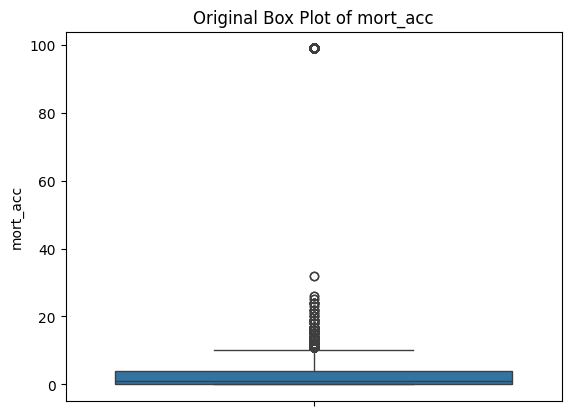

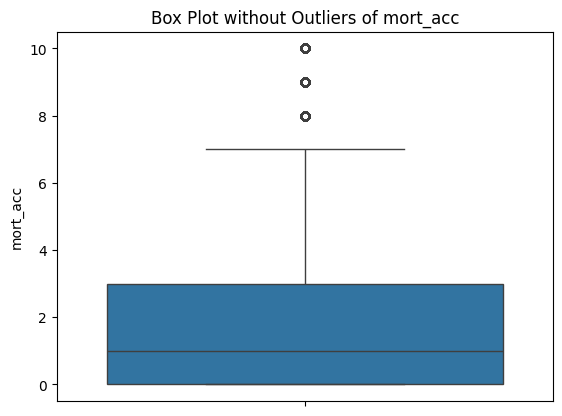

In [ ]:
# Remove outliers from dataset

df = remove_outliers(df, 'mort_acc')

In [ ]:
# Check shape of df
df[df['mort_acc'] > 10.0].shape, df.shape

((0, 16), (312634, 16))

***5. Feature Engineering : Converting following features into flags***

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

In [ ]:
df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0    36     11.44       329.48      6        6.4          10   
1     8000.0    36     11.99       265.68      6        6.5           4   
2    15600.0    36     10.49       506.97      6        6.3           0   
3     7200.0    36      6.49       220.65      7        7.2           6   
4    12000.0    60     17.27       609.33      5        5.5           9   

   home_ownership  annual_inc  verification_status  loan_status    dti  \
0               2    117000.0                    0            1  26.24   
1               1     65000.0                    0            1  22.05   
2               2     43057.0                    1            1  12.79   
3               2     54000.0                    0            1   2.60   
4               1     55000.0                    1            0  33.95   

   pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0      0.0        41.8       0.0                   0.0  
1      0.0        53.3       3.0                   0.0  
2      0.0        92.2       0.0                   0.0  
3      0.0        21.5       0.0                   0.0  
4      0.0        69.8       1.0                   0.0

**Flag creation for pub_rec**

In [ ]:
# Unique values
df['pub_rec'].value_counts()

pub_rec
0.0    265109
1.0     41707
2.0      4590
3.0      1228
Name: count, dtype: int64

In [ ]:
# Updating values greater than 0 to 1 for pub_rec
df.loc[df['pub_rec'] > 0.0, 'pub_rec'] = 1.0

In [ ]:
# Unique values
df['pub_rec'].value_counts()

pub_rec
0.0    265109
1.0     47525
Name: count, dtype: int64

**Flag creation for mort_acc**

In [ ]:
# Unique values
df['mort_acc'].value_counts()

mort_acc
0.0     127597
1.0      53877
2.0      43452
3.0      32074
4.0      23143
5.0      14783
6.0       8778
7.0       4696
8.0       2400
9.0       1205
10.0       629
Name: count, dtype: int64

In [ ]:
# Updating values greater than 0 to 1 for mort_acc
df.loc[df['mort_acc'] > 0.0, 'mort_acc'] = 1.0

In [ ]:
# Unique values
df['mort_acc'].value_counts()

mort_acc
1.0    185037
0.0    127597
Name: count, dtype: int64

**Flag creation for pub_rec_bankruptcies**

In [ ]:
# Unique values
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    274904
1.0     35896
2.0      1562
3.0       272
Name: count, dtype: int64

In [ ]:
# Updating values greater than 0 to 1 for pub_rec_bankruptcies
df.loc[df['pub_rec_bankruptcies'] > 0.0, 'pub_rec_bankruptcies'] = 1.0

In [ ]:
# Unique values
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    274904
1.0     37730
Name: count, dtype: int64

In [ ]:
df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0    10000.0    36     11.44       329.48      6        6.4          10   
1     8000.0    36     11.99       265.68      6        6.5           4   
2    15600.0    36     10.49       506.97      6        6.3           0   
3     7200.0    36      6.49       220.65      7        7.2           6   
4    12000.0    60     17.27       609.33      5        5.5           9   

   home_ownership  annual_inc  verification_status  loan_status    dti  \
0               2    117000.0                    0            1  26.24   
1               1     65000.0                    0            1  22.05   
2               2     43057.0                    1            1  12.79   
3               2     54000.0                    0            1   2.60   
4               1     55000.0                    1            0  33.95   

   pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0      0.0        41.8       0.0                   0.0  
1      0.0        53.3       1.0                   0.0  
2      0.0        92.2       0.0                   0.0  
3      0.0        21.5       0.0                   0.0  
4      0.0        69.8       1.0                   0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312634 entries, 0 to 377462
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             312634 non-null  float64
 1   term                  312634 non-null  int32  
 2   int_rate              312634 non-null  float64
 3   installment           312634 non-null  float64
 4   grade                 312634 non-null  int64  
 5   sub_grade             312634 non-null  float64
 6   emp_length            312634 non-null  int64  
 7   home_ownership        312634 non-null  int64  
 8   annual_inc            312634 non-null  float64
 9   verification_status   312634 non-null  int64  
 10  loan_status           312634 non-null  int64  
 11  dti                   312634 non-null  float64
 12  pub_rec               312634 non-null  float64
 13  revol_util            312634 non-null  float64
 14  mort_acc              312634 non-null  float64
 15  pub_r

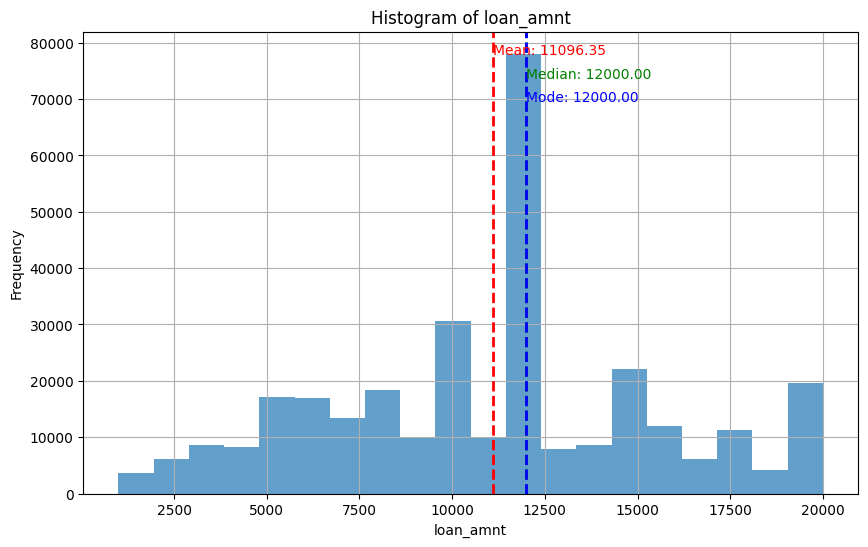

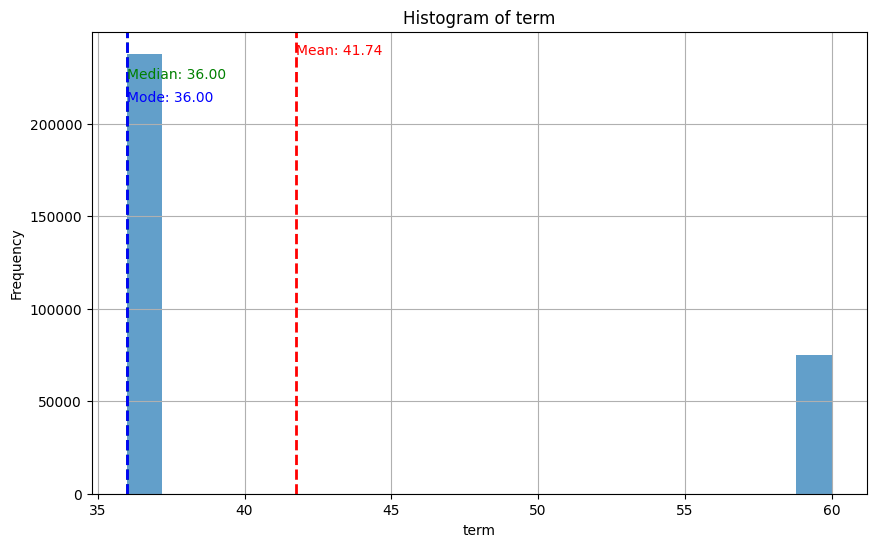

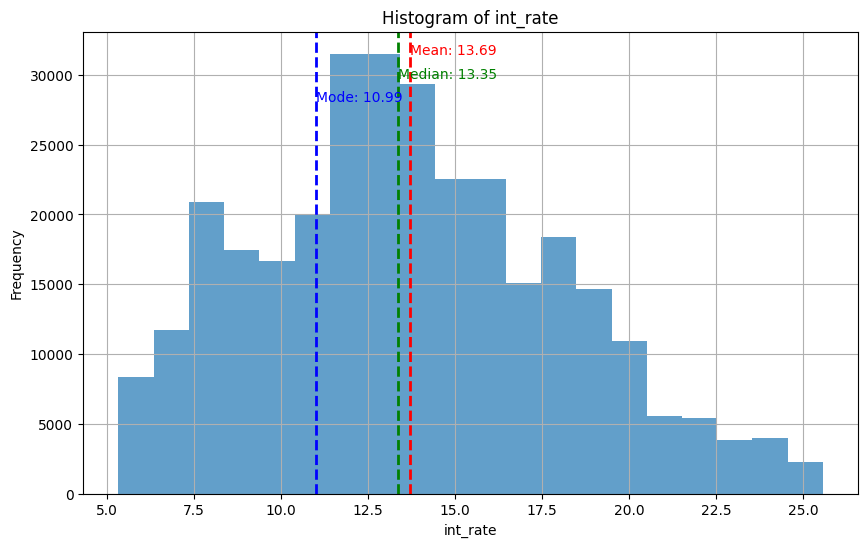

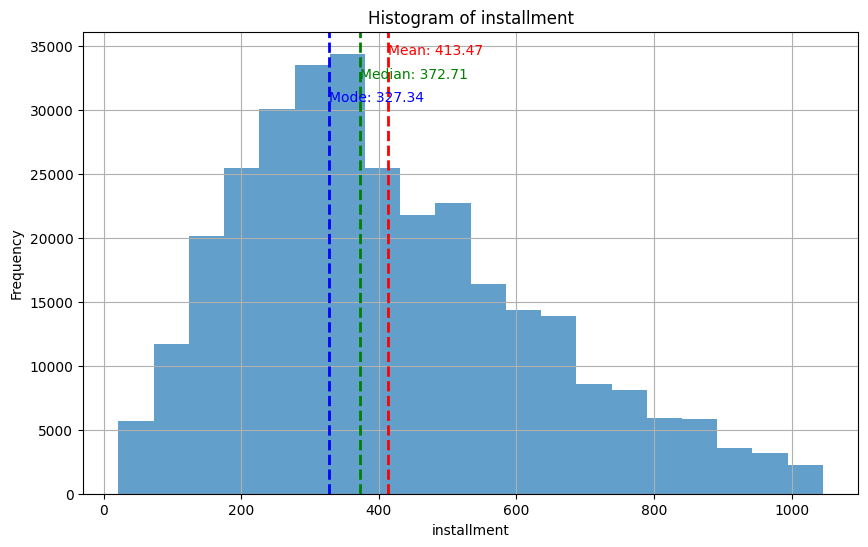

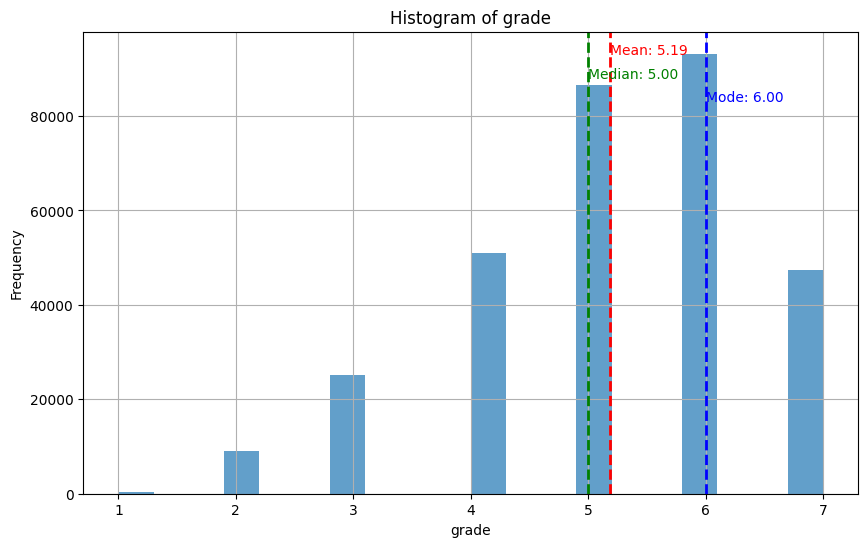

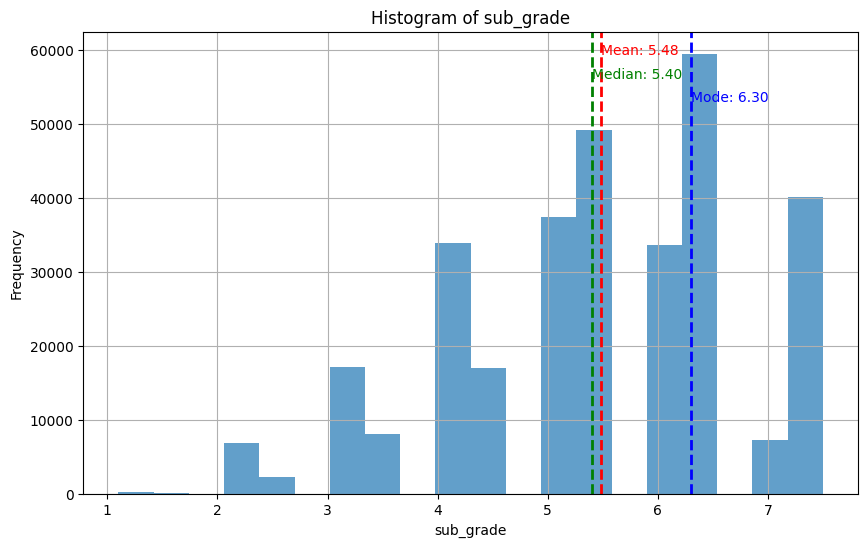

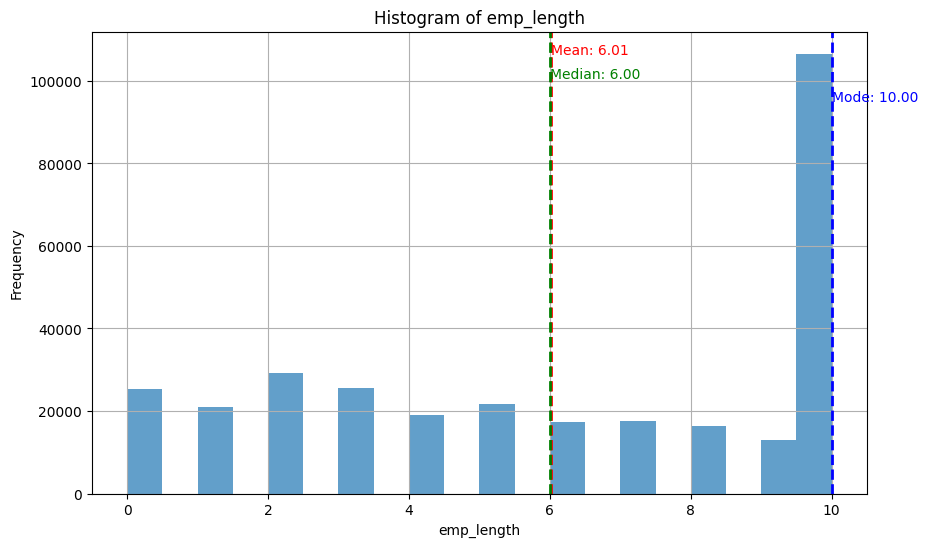

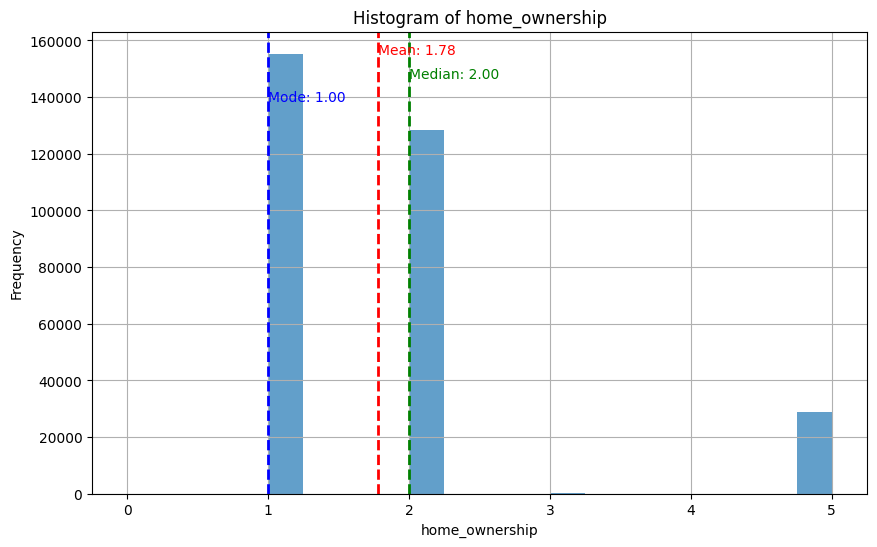

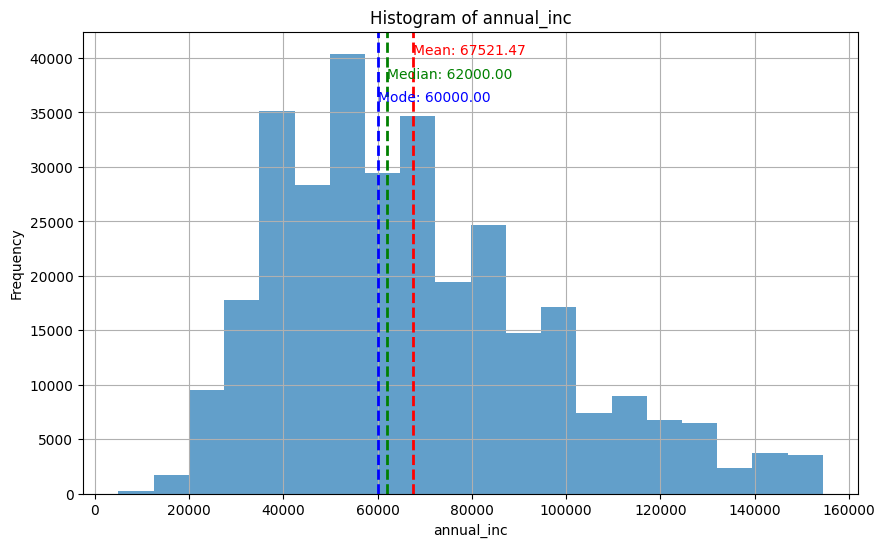

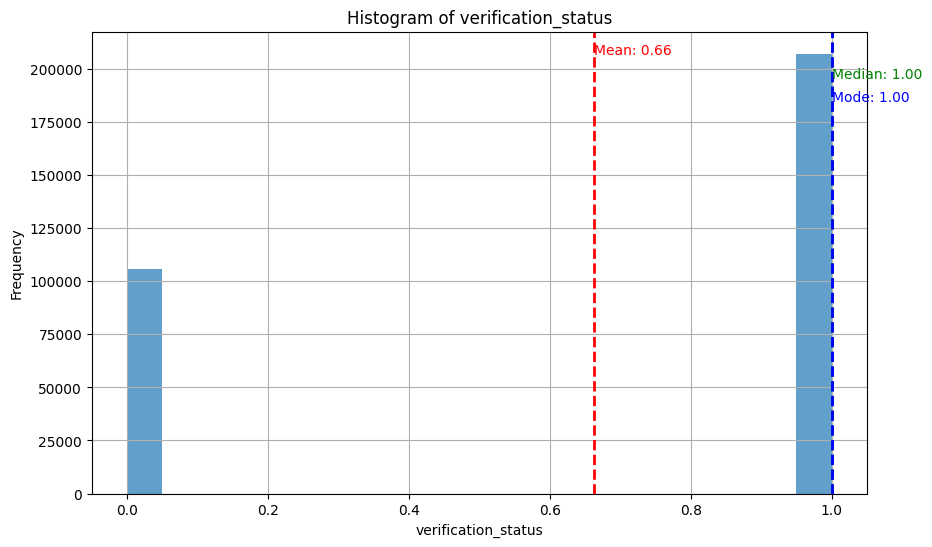

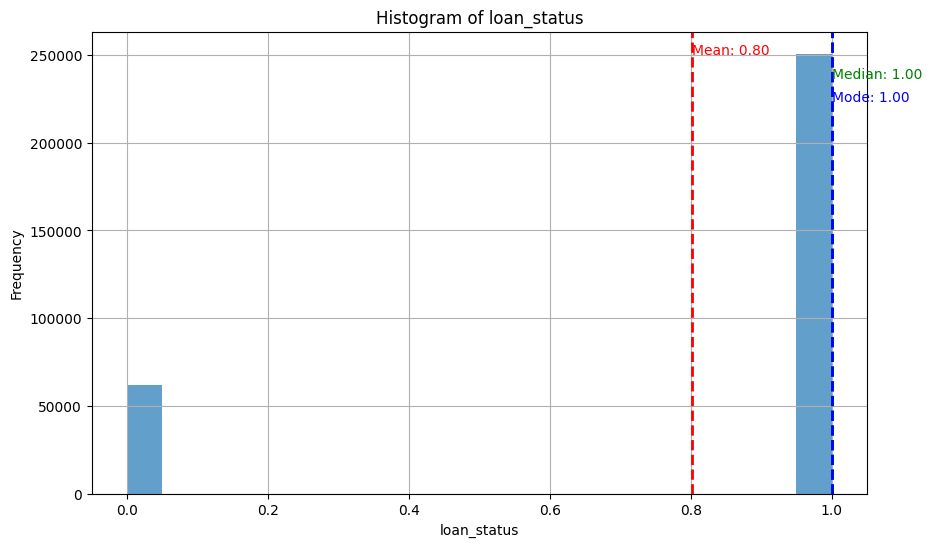

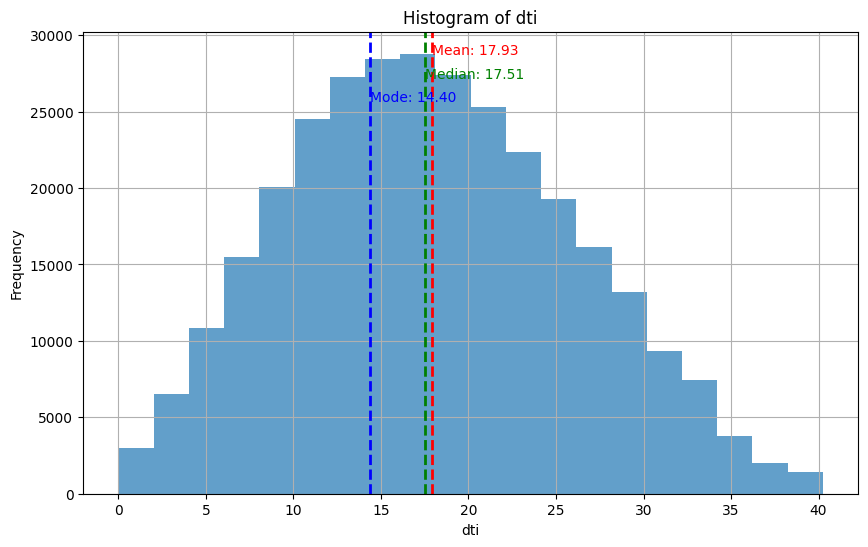

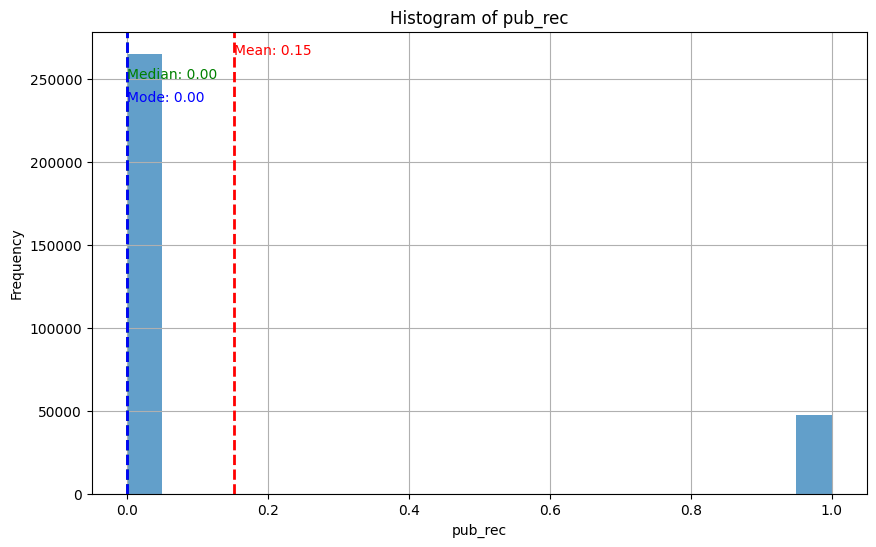

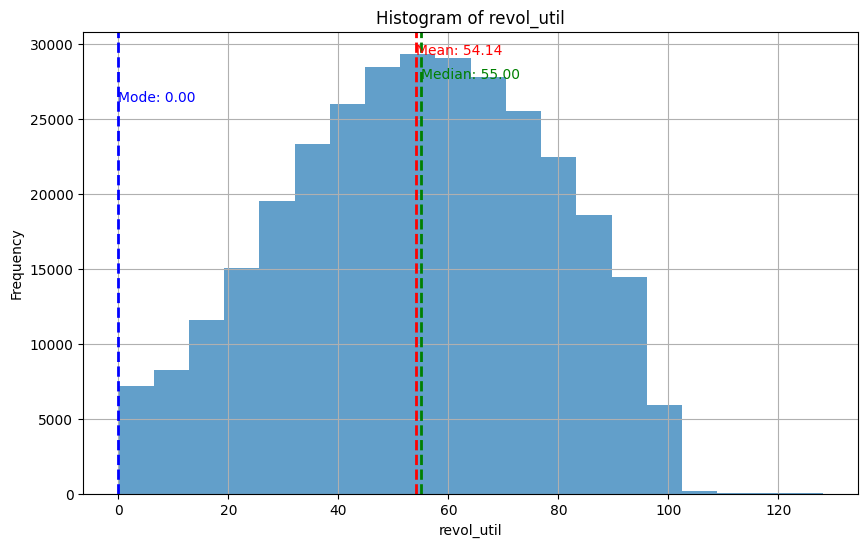

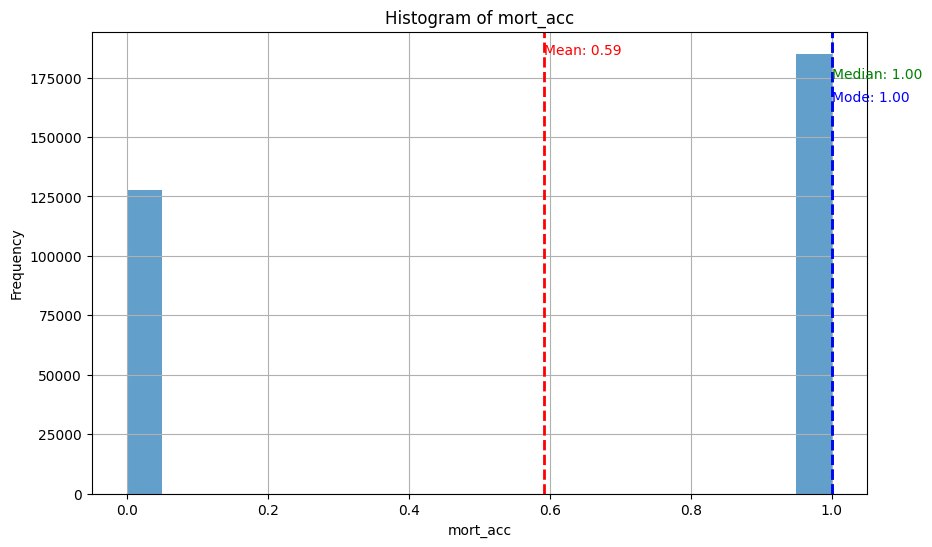

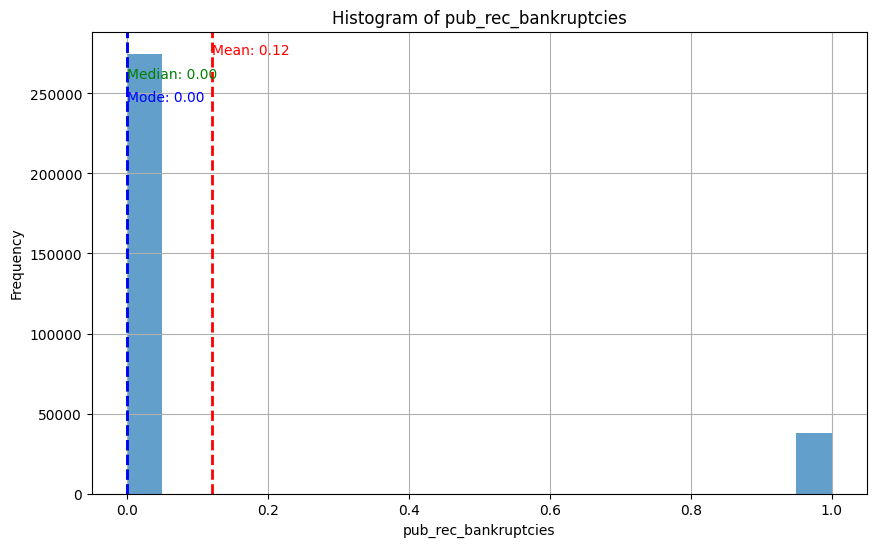

In [ ]:
histplot(df)

# ***Data Preparation for Modelling***

- Train Test Split
- Data Imbalance (SMOTE on training data)
- Feature Scaling

***Train Validation Test Split***

In [ ]:
# Define X and y
X = df.drop('loan_status', axis=1)
y = df["loan_status"]

In [ ]:
# Creating train val test data
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(187580, 15) (187580,)
(62527, 15) (62527,)
(62527, 15) (62527,)


***Imbalanced Data Check***

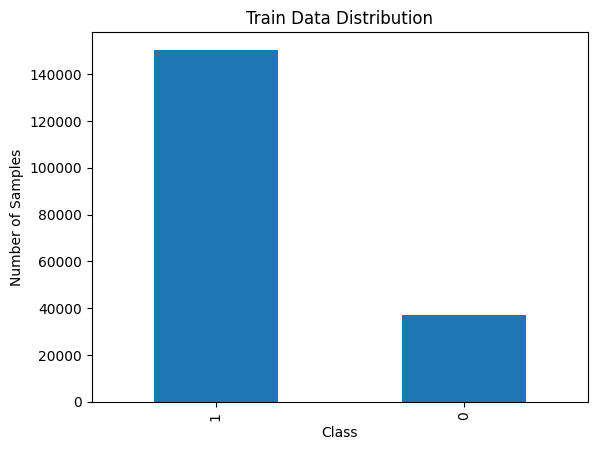

In [ ]:
# Count plot to check data imbalance

#sns.countplot(data = df, x = 'loan_status')
#plt.show()

y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

**Observation:** Training data is imbalanced, run SMOTE to balance out the data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('\nAfter Oversampling')
print(y_sm.value_counts())

Before SMOTE
loan_status
1    150412
0     37168
Name: count, dtype: int64

After Oversampling
loan_status
1    150412
0    150412
Name: count, dtype: int64


In [ ]:
type(X_sm)

pandas.core.frame.DataFrame

In [ ]:
type(y_sm)

pandas.core.series.Series

# ***3. Model building***

***1) Initially training the model to see performance***

In [ ]:
# Initially training the model to see performance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_sm, y_sm)

print("Model coefficient: ",model.coef_)
print("Model intercept: ",model.intercept_)
y_pred = model.predict(X_train)

# Checking performance of Logistic Regression Model
print(f'\nTraining Accuracy: {round((model.score(X_train, y_train))*100,3)}%')
print(f'Training F1 score: {round((f1_score(y_train, y_pred))*100,3)}%')

print(f'\nValidation Accuracy: {round((model.score(X_val, y_val))*100,3)}%')

print(f'\nTesting Accuracy: {round((model.score(X_test, y_test))*100,3)}%')

Model coefficient:  [[ 3.52647541e-05 -2.37248918e-02 -1.60317331e-02 -9.36276714e-04
   1.20460665e-02  9.48261183e-03  6.55109604e-03  2.39111796e-03
   1.68660812e-05  6.93225945e-04 -9.54555417e-03 -7.43881972e-05
   1.65504323e-03  6.53661141e-04  1.62784146e-05]]
Model intercept:  [0.00045119]

Training Accuracy: 54.368%
Training F1 score: 63.889%

Validation Accuracy: 54.231%

Testing Accuracy: 54.255%


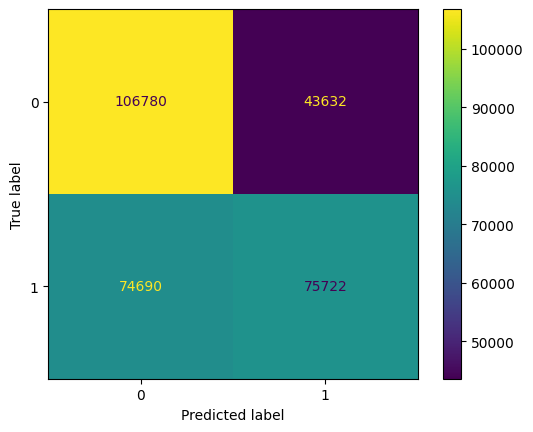

In [ ]:
# Confusion matrix before model tuning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = []

y_pred = model.predict(X_sm)

cm = confusion_matrix(y_sm,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
#calculate true negatives, false positives, false negatives and true positives
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

#calculate true positive rate and false positive rate
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

print(f"True Positive Rate: {round(tpr*100,3)}%")
print(f"False Positive Rate: {round(fpr*100,3)}%")
print(f"True Negative Rate: {round(tnr*100,3)}%")
print(f"False Negative Rate: {round(fnr*100,3)}%")

True Positive Rate: 50.343%
False Positive Rate: 29.008%
True Negative Rate: 70.992%
False Negative Rate: 49.657%


**Observation:** Training Accuracy is low

***2) Hyper parameter tuning the model to find best c = 1 / lambda (and Feature Scaling)***

Using Training and Validation Data


Best lambda: 100.01
Best C: 0.00999900009999



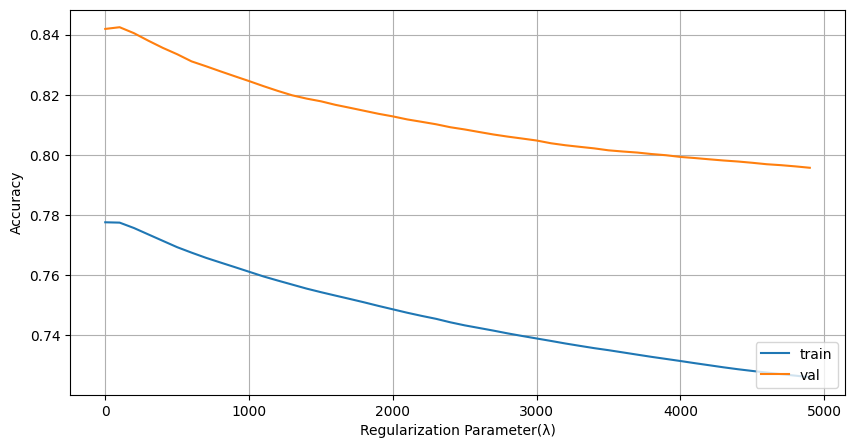

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#def accuracy(y_true, y_pred):
#  return f1_score(y_true, y_pred)

train_scores = []
val_scores = []
lambdaa = []
scaler = StandardScaler()
df_val_score = pd.DataFrame()

for la in np.arange(0.01, 5000.0, 100):                                # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_sm, y_sm)

  train_score = accuracy(y_sm, scaled_lr.predict(X_sm))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))

  train_scores.append(train_score)
  val_scores.append(val_score)
  lambdaa.append(la)

df_val_score['lambda'] = lambdaa
df_val_score['train_score'] = train_scores
df_val_score['val_score'] = val_scores

train_index = df_val_score['train_score'].argmax()
val_index = df_val_score['val_score'].argmax()
index = train_index if train_index > val_index else val_index
lambdaa = df_val_score['lambda'][index]
print(f'\nBest lambda: {lambdaa}')
print(f'Best C: {1/lambdaa}\n')

plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

***3) Train the model using best parameters***

In [ ]:
from sklearn.pipeline import Pipeline # declare the steps in our pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

pipe = Pipeline(steps = [('standardscaler', StandardScaler()),
                      ('logisticregression',LogisticRegression(C = 1/100.01))])# fit the pipeline to our training data
pipe.fit(X_sm, y_sm)# cross validate using our pipeline

cross_validate(pipe, X_sm, y_sm)

{'fit_time': array([2.07245803, 3.11459899, 1.74674249, 0.96316624, 0.89975119]),
 'score_time': array([0.05518675, 0.03637624, 0.0189321 , 0.01939464, 0.01831675]),
 'test_score': array([0.60538519, 0.76532868, 0.80651542, 0.80477022, 0.80637923])}

In [ ]:
type(X_sm)

pandas.core.frame.DataFrame

In [ ]:
type(y_sm)

pandas.core.series.Series

***Feature Scaling***

In [ ]:
'''
# Standardization
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_sm = st.transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

#y_sm = y_sm.values[:,0]
#y_val = y_val.values[:,0]
#y_test = y_test.values[:,0]

X_sm = pd.DataFrame(X_sm, columns = X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
'''

'\n# Standardization\nfrom sklearn.preprocessing import StandardScaler\n\nst = StandardScaler()\n\nX_sm = st.transform(X_sm.values)\nX_val_scaled = st.transform(X_val.values)\nX_test_scaled = st.transform(X_test.values)\n\n#y_sm = y_sm.values[:,0]\n#y_val = y_val.values[:,0]\n#y_test = y_test.values[:,0]\n\nX_sm = pd.DataFrame(X_sm, columns = X_train.columns)\nX_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)\n'

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_sm = pd.DataFrame(st.fit_transform(X_sm.values), columns = X_train.columns)

X_val_scaled = pd.DataFrame(st.transform(X_val.values), columns = X_val.columns)
X_test_scaled = pd.DataFrame(st.transform(X_test.values), columns = X_test.columns)

#y_sm = y_sm.values[:,0]
#y_val = y_val.values[:,0]
#y_test = y_test.values[:,0]

In [ ]:
X_sm.head()

loan_amnt      term  int_rate  installment     grade  sub_grade  \
0  -1.272282 -0.662451 -1.420824    -1.154669  0.904772   0.671431   
1   0.151789  1.572360 -0.830609     0.595125  0.904772   0.826569   
2   0.819322  1.572360 -0.011391    -0.330128  0.145472   0.128446   
3   0.151789 -0.662451 -1.494011    -0.215632  0.904772   0.671431   
4   0.151789  1.572360  0.260108     0.715623  0.145472   0.206016   

   emp_length  home_ownership  annual_inc  verification_status       dti  \
0   -1.394130       -0.672962   -1.263110            -1.307121  0.840302   
1   -0.814854        0.283628    0.396743             0.765040 -0.190901   
2    1.212614       -0.672962   -0.380209             0.765040  1.034625   
3   -0.814854        0.283628    0.573323             0.765040 -0.825687   
4   -0.814854       -0.672962   -0.309577             0.765040 -0.048398   

    pub_rec  revol_util  mort_acc  pub_rec_bankruptcies  
0 -0.454623   -1.208609  0.924505             -0.393962  
1 -0.454623   -1.610008 -1.221180             -0.393962  
2 -0.454623   -0.361211 -1.221180             -0.393962  
3  2.514406   -1.079269 -1.221180              2.894412  
4 -0.454623    0.544168  0.924505             -0.393962

***Model Training***

In [ ]:
# Model Training using L1 regularizer, Liblinear solver is the alogirthm to be used in Optimization problem
# liblinear is used because this is a binary classification problem

lr = LogisticRegression(C = 1/100.01 , penalty= 'l1', solver = 'liblinear')
lr.fit(X_sm, y_sm)

print(f"Accuracy Training Data: {round(accuracy(y_sm, lr.predict(X_sm))*100,3)}%")
print(f"Accuracy Validation Data: {round(accuracy(y_val, lr.predict(X_val))*100,3)}%")
print(f"Accuracy Testing Data: {round(accuracy(y_test, lr.predict(X_test))*100,3)}%")

Accuracy Training Data: 77.821%
Accuracy Validation Data: 89.097%
Accuracy Testing Data: 89.029%


***Observation:***

> **Before Model Tuning**
- Training Accuracy: 66.678%
- Validation Accuracy: 66.533%
- Testing Accuracy: 66.846%

> **After Model Tuning**
- Accuracy Training Data: 77.685%
- Accuracy Validation Data: 89.097%
- Accuracy Testing Data: 89.029%

In [ ]:
# Values of coefficients
abs(lr.coef_[0])

array([0.15008059, 0.09514791, 1.94052566, 0.05349615, 9.73636773,
       6.85838902, 0.08910201, 0.14799312, 0.2094959 , 0.23028672,
       0.17233945, 0.03447501, 0.12792249, 0.15161557, 0.02422946])

In [ ]:
# Intercept Value
lr.intercept_

array([-0.42416713])

In [ ]:
# List of class labe;s
lr.classes_

array([0, 1])

In [ ]:
print(lr.n_features_in_, lr.feature_names_in_)

15 ['loan_amnt' 'term' 'int_rate' 'installment' 'grade' 'sub_grade'
 'emp_length' 'home_ownership' 'annual_inc' 'verification_status' 'dti'
 'pub_rec' 'revol_util' 'mort_acc' 'pub_rec_bankruptcies']


***4) Plotting Feature Importances***

In [ ]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = lr.feature_names_in_
feature_imp['importance'] = abs(lr.coef_[0])

#feature_imp = pd.DataFrame(list(zip(lr.feature_names_in_,np.abs(lr.coef_[0]))), columns = ['feature','importance'])

feature_imp.sort_values(by='importance', ascending=False, inplace = True)
feature_imp.head()

feature  importance
4                grade    9.736368
5            sub_grade    6.858389
2             int_rate    1.940526
9  verification_status    0.230287
8           annual_inc    0.209496

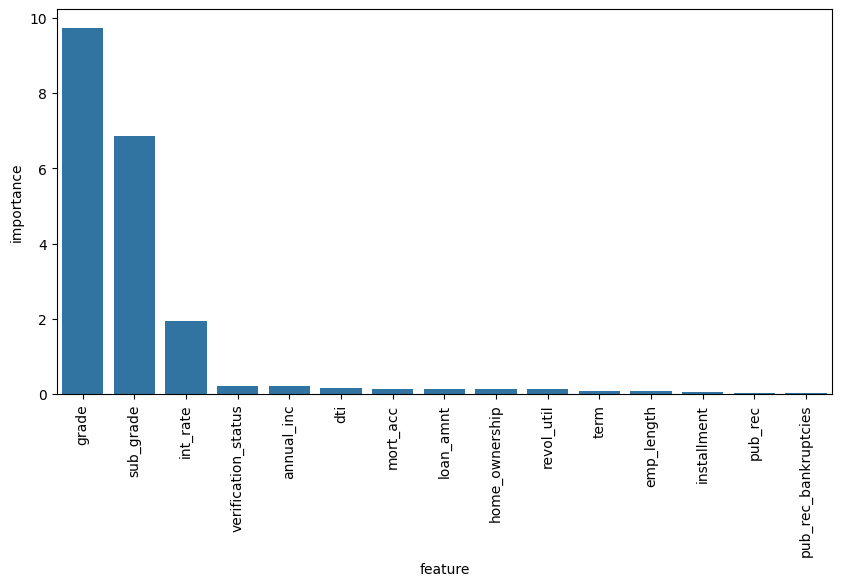

In [ ]:
# Plotting Feature Impotrances

import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x = 'feature', y = 'importance', data = feature_imp)
plt.xticks(rotation = 90)
plt.show()

**Observation:**
- Grade
- Sub-Grade
are the most important features, followed by
- Interest rate
- Verification Status

# ***4. Results Evaluation***

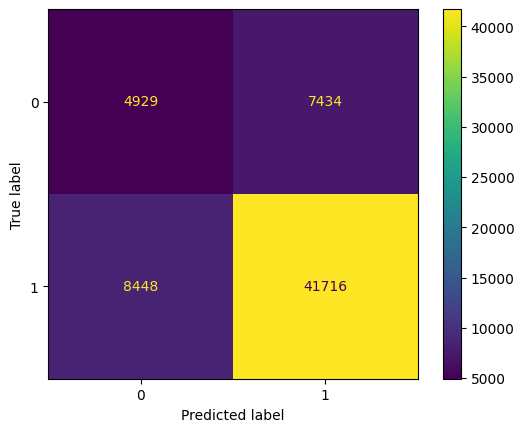

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = []

y_pred = lr.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
#calculate true negatives, false positives, false negatives and true positives
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

#calculate true positive rate and false positive rate
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

print(f"True Positive Rate: {round(tpr*100,3)}%")
print(f"False Positive Rate: {round(fpr*100,3)}%")
print(f"True Negative Rate: {round(tnr*100,3)}%")
print(f"False Negative Rate: {round(fnr*100,3)}%")

True Positive Rate: 83.159%
False Positive Rate: 60.131%
True Negative Rate: 39.869%
False Negative Rate: 16.841%


In [ ]:
# Precision Recall F1 score
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38     12363
           1       0.85      0.83      0.84     50164

    accuracy                           0.75     62527
   macro avg       0.61      0.62      0.61     62527
weighted avg       0.75      0.75      0.75     62527



AUC for Precision, Recall: 88.8422%


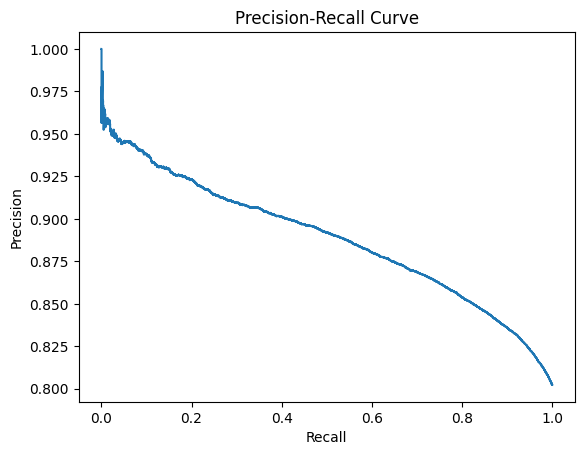

In [ ]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])
print(f"AUC for Precision, Recall: {round(auc(recall, precision)*100,4)}%")

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

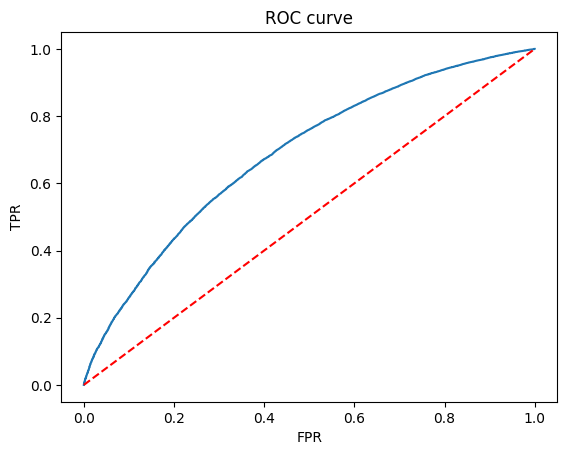

AUC for ROC: 68.6341%


In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

probability = lr.predict_proba(X_test_scaled)

probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print(f"AUC for ROC: {round(roc_auc_score(y_test,probabilites)*100,4)}%")

**Observation:**

> **Before Model Tuning**
- Training Accuracy: 66.678%
- Validation Accuracy: 66.533%
- Testing Accuracy: 66.846%

- True Positive Rate: 50.343%
- False Positive Rate: 29.008%
- True Negative Rate: 70.992%
- False Negative Rate: 49.657%

> **After Model Tuning**
- Accuracy Training Data: 77.685%
- Accuracy Validation Data: 89.097%
- Accuracy Testing Data: 89.029%

- True Positive Rate: 83.081% (Given loan predicted correctly)
- False Positive Rate: 59.937% (Loan not given NOT predicted correctly)
- True Negative Rate: 40.063% (Loan not given predicted correctly)
- False Negative Rate: 16.919% (Given loan NOT predicted correctly)

> After model tuning,
- Accuracy of Validation and Training data increased from 66% to 89%
- True Positive Rate increased from 50% to 83% (Loan given to correct individuals)
- False Negative Rate has reduced from 50% to 16% - which is good. (Lost business saved)
- **FPR has increased, and TNR has reduced after model tuning (not ideal - Loan would be given to wrong individuals)**
- AUC as per PR Curve is 88% and ROC curve is 68%.
- F1 score for giving a loan is 84&
- **Most Important Features**:
 *   Grade
 *  Sub-Grade
are the most important features, followed by
 *  Interest rate
 *  Verification Status
 *  Annual Income
 *  DTI

## ***Trade-off***

1) We should make sure that our model can detect real defaulters and there are less false positives.
This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- We can further optimize the model to reduce false positives by removing features that hold less importance which will help reduce a lot of noise from features.
- ALternatively, better classification models like KNN, Decisiton tree, Random Forest, GBDT, XGBoost, Light GBM can be used to obtain better results.

2) Since NPA (non-performing asset) is a real problem in this industry, it’s important to play safe and not disburse loans to anyone.
 - As the important feature sin the model are grade, sub-grade, Verification Status, it would help us understand the credit of customer before dispersing loans and interest rates can be decided according to the risk of customer.

# ***5. Actionable Insights and Recommendation***

## ***Dataset Summary:***

* Dataset has 27 features and 396k samples in the data
* Missing value treatment is done for **emp_length**, **revol_util**, **mort_acc**, **pub_rec_bankruptcies**
* **Loan duration** is either 36 (3 yrs) or 60 months (5 yrs) - Majorly 3 yrs hence such a short term loan would be for motorcycle, other small items.
* **Grade assigned by CompanyX** is from A to G, large number of loans have B & C grade loans.
* **Home ownership** is categorized as (Label Encoding)
>* MORTGAGE - still paying off mortgage, high risk (1)
>* RENT - rent, medium risk (2)
>* OWN - mortgage if any, paid off, low risk (5)
>* OTHER - enough information not available (3)
>* NONE - enough information not available (0)
>* ANY - enough information not available (4)

* **Verification Status** for 2/3rd individuals is verified, about 1/3rd Not verified.
* **Loan status** is Fully Paid for most, and Charged off for some.
* **Initial List status** i.e. loan's first category is 1.5 times more with "f", then "w"
* Most **Loan application type** is Individual, followed by Joint, and Direct_pay
* **Bankrupcy records for borrower** (pub_rec_bankruptcies) is categorized between 0 to 8 from most with 0 and least with 8.

* loan_amnt is (500.0, 40000.0)
* int_rate is (5.32, 30.99)
* installment is (16.08, 1533.81)
* annual_inc is (0.0, 8706582.0)
* dti
 (Min,Max) : (0.0, 9999.0)
* open_acc
 (Min,Max) : (0.0, 90.0)
* pub_rec
 (Min,Max) : (0.0, 86.0)
* revol_bal
 (Min,Max) : (0.0, 1743266.0)
* revol_util
 (Min,Max) : (0.0, 892.3)
* total_acc
 (Min,Max) : (2.0, 151.0)

## ***Actionable Insights:***

#### ***Univariate Analysis:***
* **Loan status**, the target variavle, is Fully Paid (1) Charged off (0).
* **Loan duration** is either 36 (3 yrs) or 60 months (5 yrs) - Majorly 3 yrs hence such a short term loan would be for motorcycle, other small items.
* **Grade assigned by CompanyX** is from A to G, each grade has 3 sub grades, A being the best grade (7) and G being the worst (1).
* **Verification Status** for 2/3rd individuals is verified, about 1/3rd Not verified.
* **int_rate** is (5.32, 30.99) is a little little skewed but normal distribution
* **annual_inc** is (0.0, 8706582.0) is mostly on the lower end but heavily right skewed
* **dti (Min,Max)** : (0.0, 9999.0) is almost normal but right skewed values almost ~0
* Most **Loan application type** is Individual, followed by Joint, and Direct_pay
* **Bankrupcy records for borrower** (pub_rec_bankruptcies) is categorized between 0 to 8 from most with 0 and least with 8.


#### ***Bivariate / Multivariate Analysis:***
* All continuous variables are non normal hence outlier treatment will need to be done
* As loan amount and interest rate is increasing, loan status being charged off is increasing and it's variance is also increasing - ***Implies high loan amount issues with high interest rate, also has high inherent risk of it being an NPA (Non Performing Asset)***



#### ***Logistic Regression Classification Model Results:***

> **Before Model Tuning**
- Training Accuracy: 66.678%
- Validation Accuracy: 66.533%
- Testing Accuracy: 66.846%

- True Positive Rate: 50.343%
- False Positive Rate: 29.008%
- True Negative Rate: 70.992%
- False Negative Rate: 49.657%

> **After Model Tuning**
- Accuracy Training Data: 77.685%
- Accuracy Validation Data: 89.097%
- Accuracy Testing Data: 89.029%

- True Positive Rate: 83.081% (Given loan predicted correctly)
- False Positive Rate: 59.937% (Loan not given NOT predicted correctly)
- True Negative Rate: 40.063% (Loan not given predicted correctly)
- False Negative Rate: 16.919% (Given loan NOT predicted correctly)

> After model tuning,
- Accuracy of Validation and Training data increased from 66% to 89%
- True Positive Rate increased from 50% to 83% (Loan given to correct individuals)
- False Negative Rate has reduced from 50% to 16% - which is good. (Lost business saved)
- **FPR has increased, and TNR has reduced after model tuning (not ideal - Loan would be given to wrong individuals)**
- AUC as per PR Curve is 88% and ROC curve is 68%.
- F1 score for giving a loan is 84&
- **Most Important Features**:
 *   Grade
 *  Sub-Grade
are the most important features, followed by
 *  Interest rate
 *  Verification Status
 *  Annual Income
 *  DTI

## ***Recommendation***

1) Whenever there is high loan amount and high interest rate charged, given this is financial transaction ensure human screening is done to check whether it is an NPA or not and additional approval needed for such loan disbursements.

2) Logistic Regression Model accuracy has improved from 66% to 89% after model tuning, which is good but further action to be taken to try and reduce False Positive rate (FPR) to ensure loan is not allocated to individuals who might possibly default on Loan Repayments

3) Based on Feature Importance and Feature Selection techniques like ***Recursive Feature Elimination*** or Feature*** Selection using SelectFromModel*** for Classification, remove features that are not important and do not improve the explanatory power of the model in order to improve model accuracy.

4) Use Ensemble methods by traiming dataset on different classification models to achieve much accurate results.

5) Since Grade, Sub Grade, Interest Rate, Verification Status, Annual Income, and DTI are important features, ensure they are factored in when issuing loans.

6) Additional Feature Engineering can be done to create and bundle features that explain the credit worthiness of an individual e.g. a FICO or CIBIL score.